# <span> Laboratorio di Simulazione Numerica  </span>
## <span> Esercitazione 11 </span>

### Esercizio 11.1
Lo scopo di questo esercizio è quello di eseguire un fit lineare di dati campionati secondo la funzione

$$f(x)=2x+1$$

per $x \in [-1,1]$. Ai dati viene aggiunto un rumore Gaussiano con deviazione standard $\sigma$. I dati vengono divisi in dati di training, sui quali la rete verrà allenata, e in dati di validazione, sui quali la rete verrà testata. Nel corso di tutta l'esercitazione il numero di dati di validazione sarà sempre pari a $1/10$ dei dati di training. <br>
Questo problema può essere risolto da una rete neurale formata da un singolo neurone: questo infatti riceve un input $x$, restituendo come output $y = wx + b$, dove $w$ e $b$ sono i parametri del neurone. In assenza di una funzione di attivazione un singolo neurone è quindi in grado di descrivere bene un modello lineare. I parametri della rete vengono determinati minimizzando la funzione di costo data dal <i>Mean Square Error</i> (<i>MSE</i>) attraverso lo <i>Stochastic Gradient Descent</i> (<i>SGD</i>) nella fase di allenamento del modello sui dati di training.

In questo esercizio vogliamo vedere come variano le performance della rete al variare dei seguenti parametri:

- <span> Deviazione Standard $\sigma$ </span>
- <span> Numero di epoche $N_{epochs}$ </span>
- <span> Numero di dati di training $N_{train}$ </span>

È stato variato ciascun parametro tenendo fissi gli altri due. Per ogni set di parametri scelti vengono riportati tre grafici: il primo mostra la distribuzione dei dati di validazione rispetto alla funzione da fittare; il secondo mostra l'andamento della funzione costo all'aumentare del numero di epoche sia per i dati di training che di validazione; l'ultimo mostra la predizione della rete neurale su nuovi dati dati generati casualmente nell'intervallo di training.

Partiamo variando $\sigma$ e fissando $N_{epochs} = 50$ e $N_{train} = 500$. Di seguito riportiamo i risultati ottenuti.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, Ftrl

tf.autograph.set_verbosity(0)
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

%config InlineBackend.figure_format = 'retina'

np.random.seed(0)

In [2]:
def model(sigma, N_train, N_epochs):
    
    print()
    m = 2
    b = 1

    fig, ax = plt.subplots(1,3, figsize=(22,5))
    plt.suptitle("$\sigma=$"+ str(sigma) + "  $N_{train}=$" + str(N_train) + "  $N_{epochs}=$" + str(N_epochs), fontsize=24, y=1.06)
    
    x_train = np.random.uniform(-1, 1, N_train)
    x_valid = np.random.uniform(-1, 1, int(N_train/10))
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function
    
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
    
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])  
    ### model.summary()
    
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
    
    ax[0].plot(x_valid, y_target, label='Target', color='tab:blue')
    ax[0].scatter(x_valid, y_valid, color='tab:red', label='Validation data')
    ax[0].set_title('Validation data', fontsize=16)
    ax[0].set_ylabel('y', fontsize=12)
    ax[0].set_xlabel('x', fontsize=12)
    ax[0].legend(loc='best', fontsize=12)
    ax[0].grid(True)
    
    ax[1].plot(history.history['loss'], color='tab:blue')
    ax[1].plot(history.history['val_loss'], color='tab:orange')
    ax[1].set_title('Model loss', fontsize=16)
    ax[1].set_ylabel('Loss', fontsize=12)
    ax[1].set_xlabel('Number of epochs', fontsize=12)
    ax[1].legend(['Train', 'Test'], loc='best', fontsize=12)
    ax[1].grid(True)
    
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    
    ax[2].scatter(x_predicted, y_predicted, color='tab:red', label='Predicted')
    ax[2].plot(x_valid, y_target, color='tab:blue', label='Target')
    ax[2].set_title('Prediction', fontsize=16)
    ax[2].set_ylabel('y', fontsize=12)
    ax[2].set_xlabel('x', fontsize=12)
    ax[2].legend(loc='best', fontsize=12)
    ax[2].grid(True)

    plt.show()
   
    ###print(model.get_weights())
    m, b = model.get_weights()
    print ('Fit parameters f(x) = mx+b')
    print('  m =', m[0][0])
    print('  b =', b[0])
    print()
    
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # evaluate model with the exact curve
    score_ex_cur = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print('Evaluate model with valid set                Evaluate model with exact curve')
    print(' Test loss =', "{:.7f}".format(score[0]), '                       Test loss =', "{:.7f}".format(score_ex_cur[0]))
    print(' Test accuracy =', "{:.7f}".format(score[1]), '                   Test accuracy =', "{:.7f}".format(score_ex_cur[1]))
    
    print()
    print('===================================================================================================================')

2021-09-26 23:35:45.169953: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-26 23:35:45.170123: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


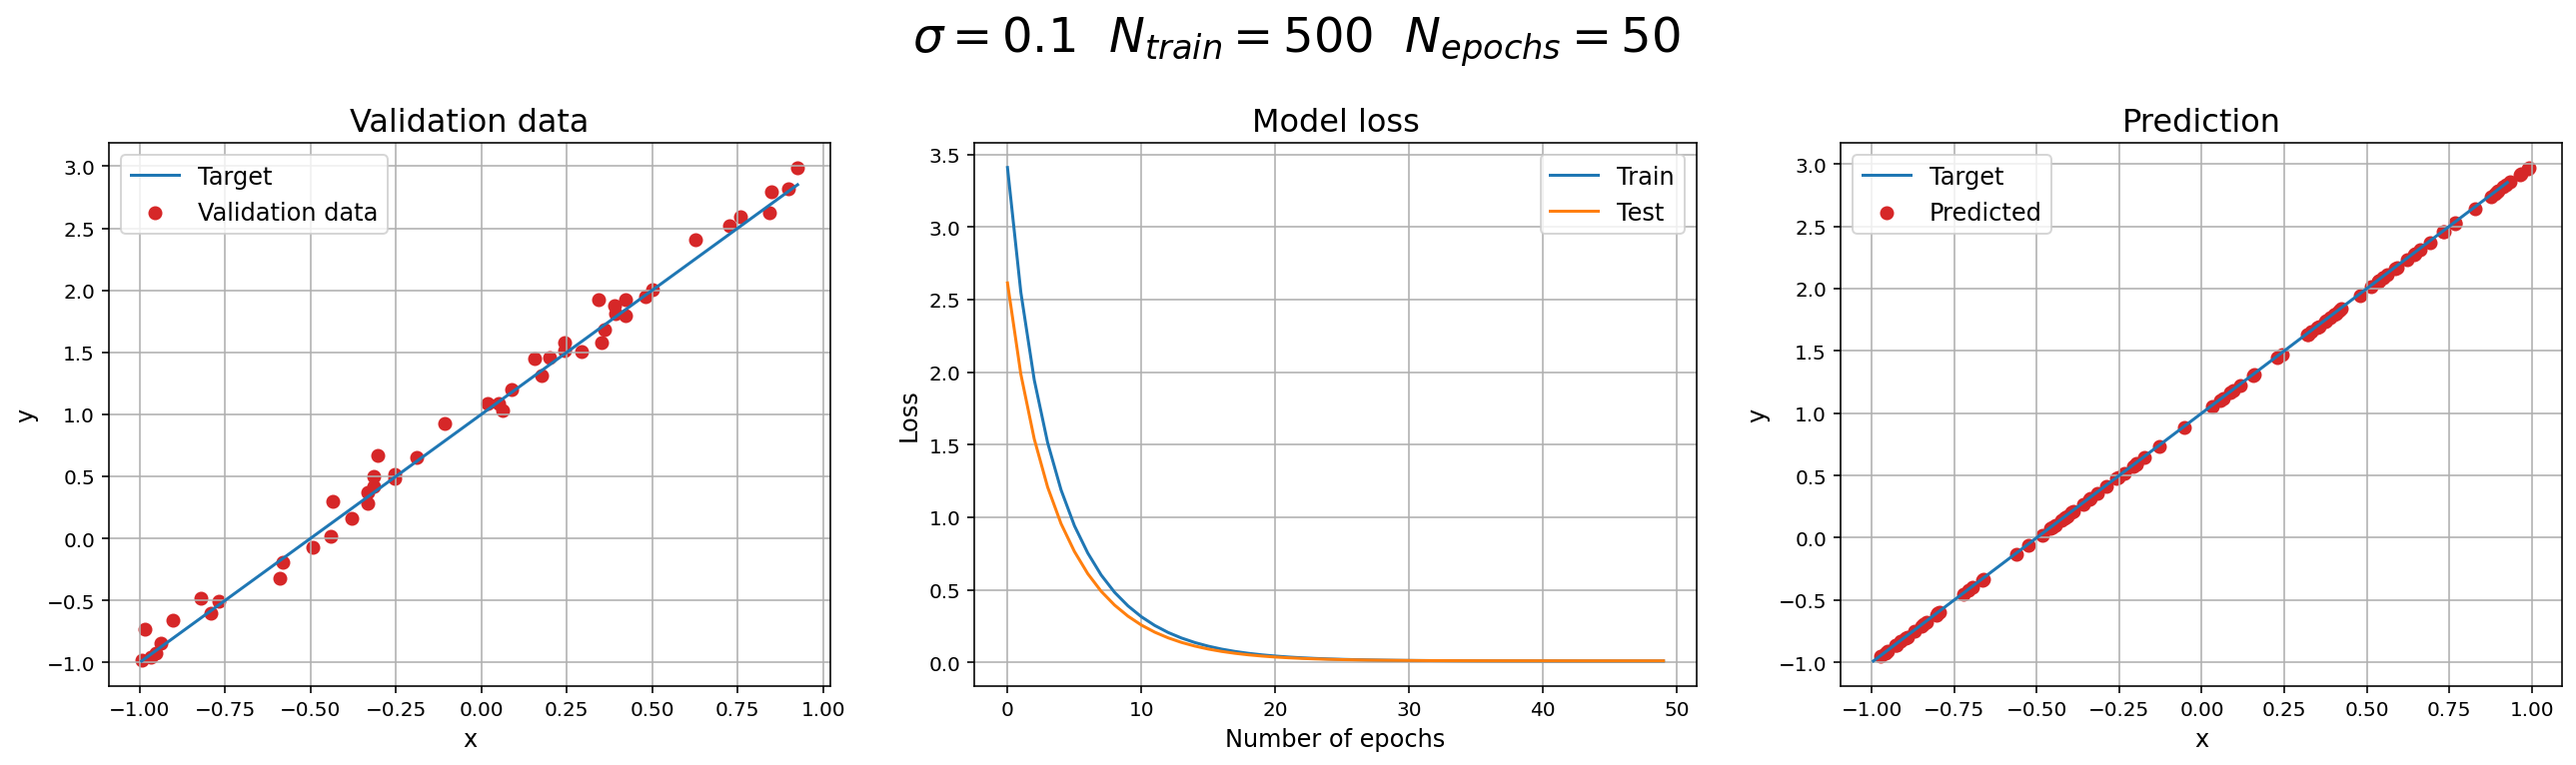

Fit parameters f(x) = mx+b
  m = 1.9979591
  b = 0.9889802

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0111271                        Test loss = 0.0001204
 Test accuracy = 0.0111271                    Test accuracy = 0.0001204




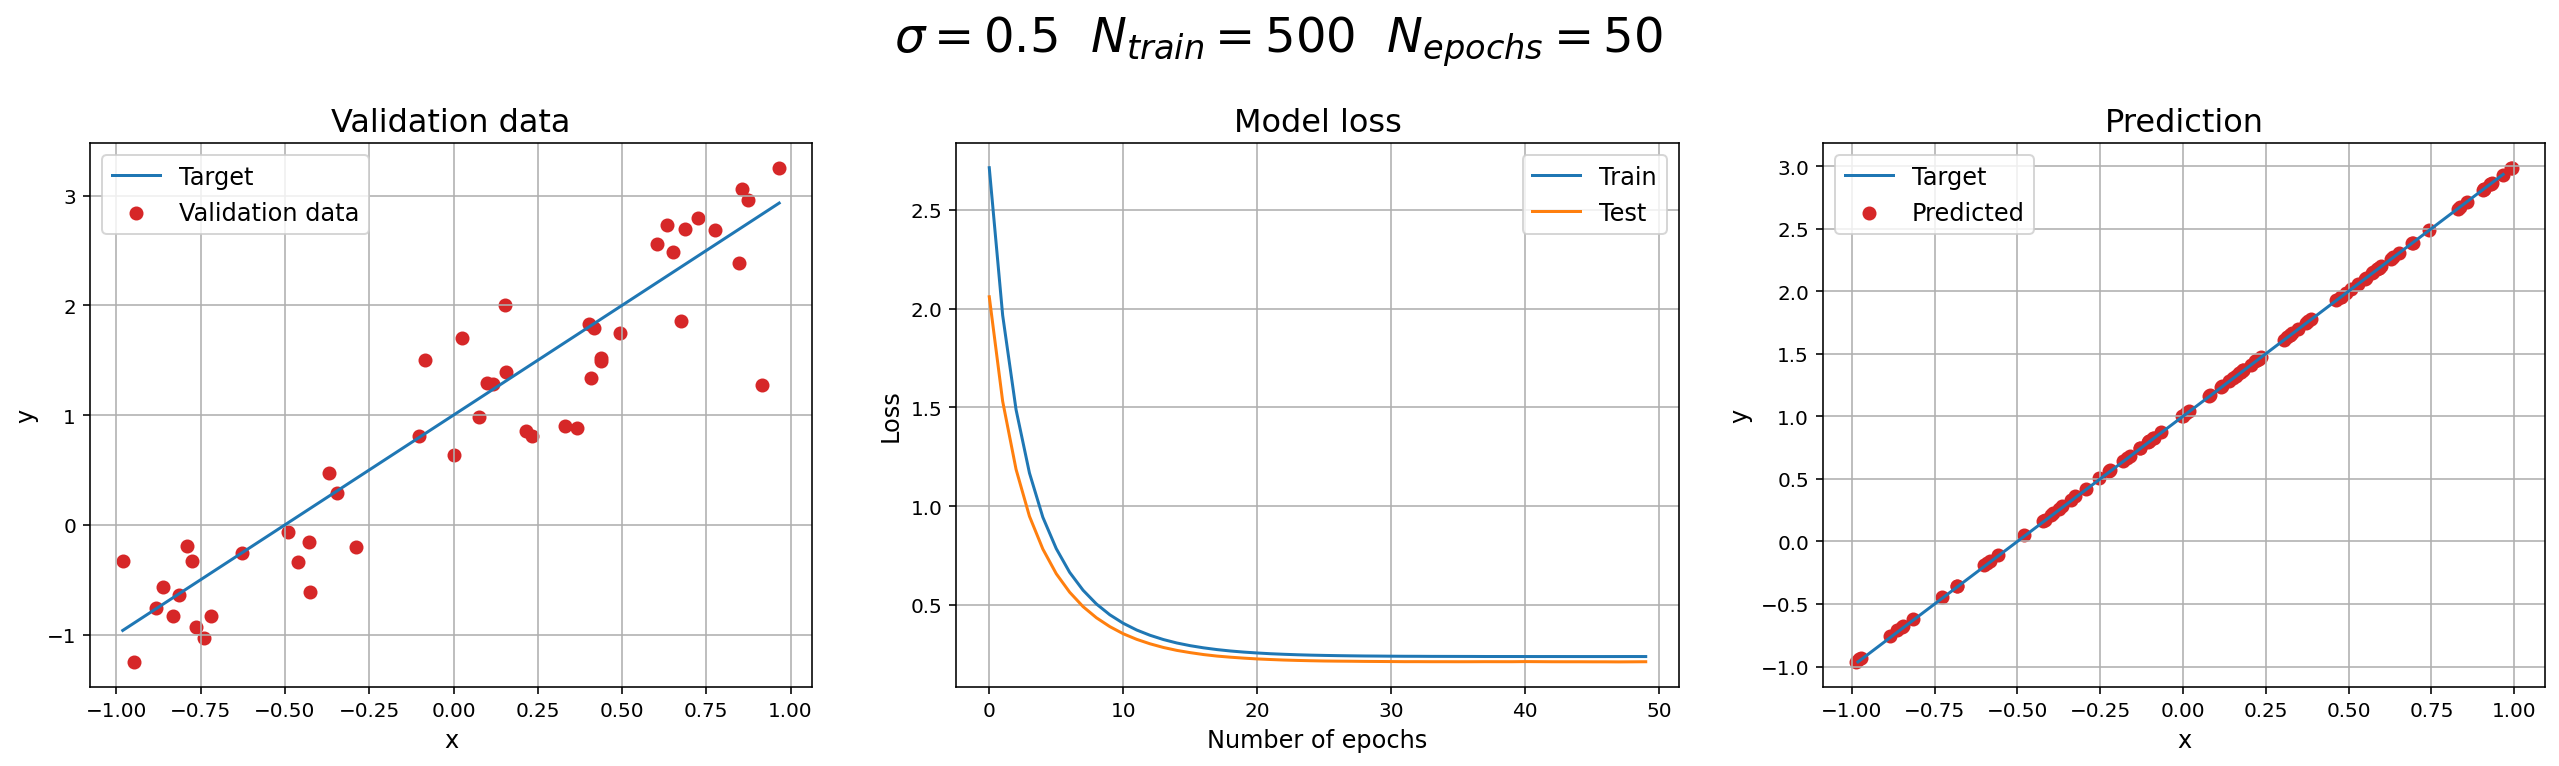

Fit parameters f(x) = mx+b
  m = 1.9920771
  b = 1.0061014

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.2118688                        Test loss = 0.0000582
 Test accuracy = 0.2118688                    Test accuracy = 0.0000582




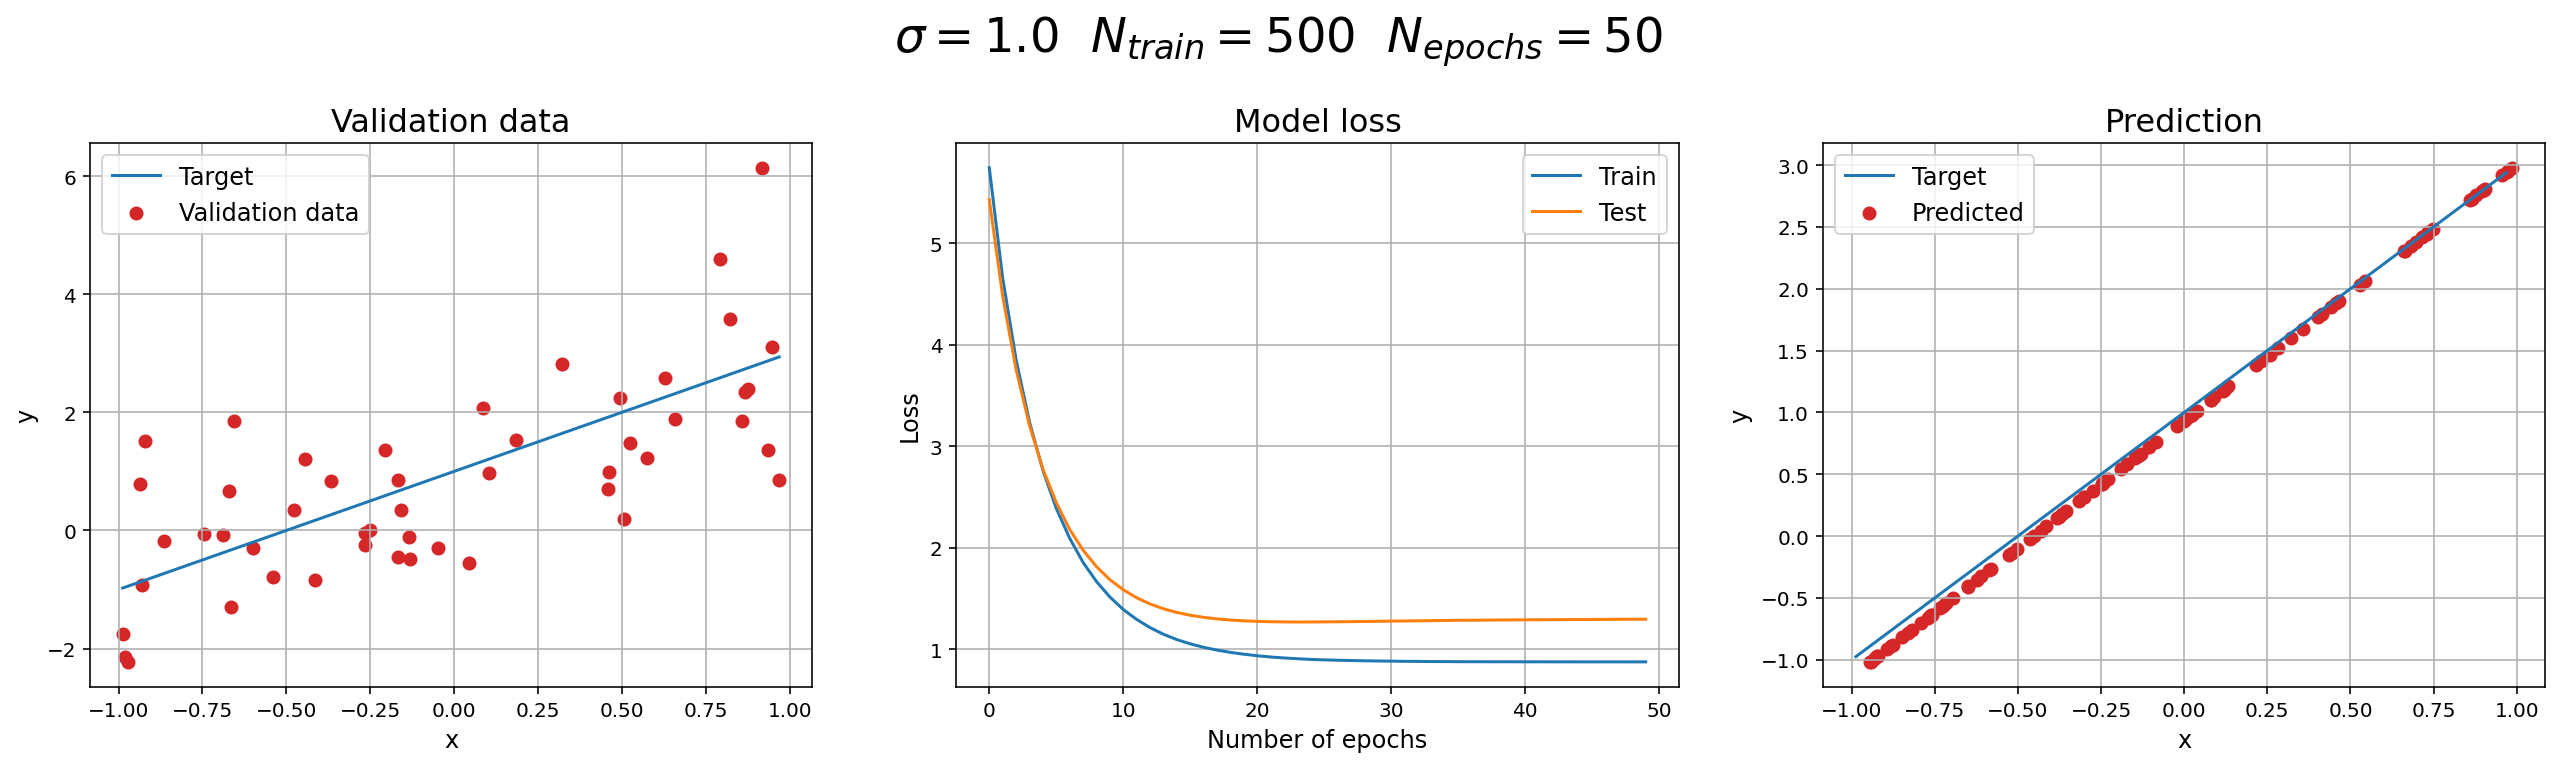

Fit parameters f(x) = mx+b
  m = 2.069547
  b = 0.9361464

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 1.2964084                        Test loss = 0.0062950
 Test accuracy = 1.2964084                    Test accuracy = 0.0062950



In [3]:
print('===================================================================================================================')
sigma_list = [0.1, 0.5, 1.0]
for sigma in sigma_list:
    model(sigma, 500, 50)

Come ci si poteva aspettare, la performance della rete peggiora all'aumentare di $\sigma$. Per grandi valori di $\sigma$, a causa della forte dispersione dei dati, la rete fa più fatica a fittare la funzione desiderata ed  è necessario aumentare $N_{train}$ e $N_{epochs}$ per ottenere un risultato preciso. 

D'ora in avanti considereremo sempre $\sigma = 0.1$. Proviamo ora a variare il numero di epoche, fissando $N_{train} = 500$.

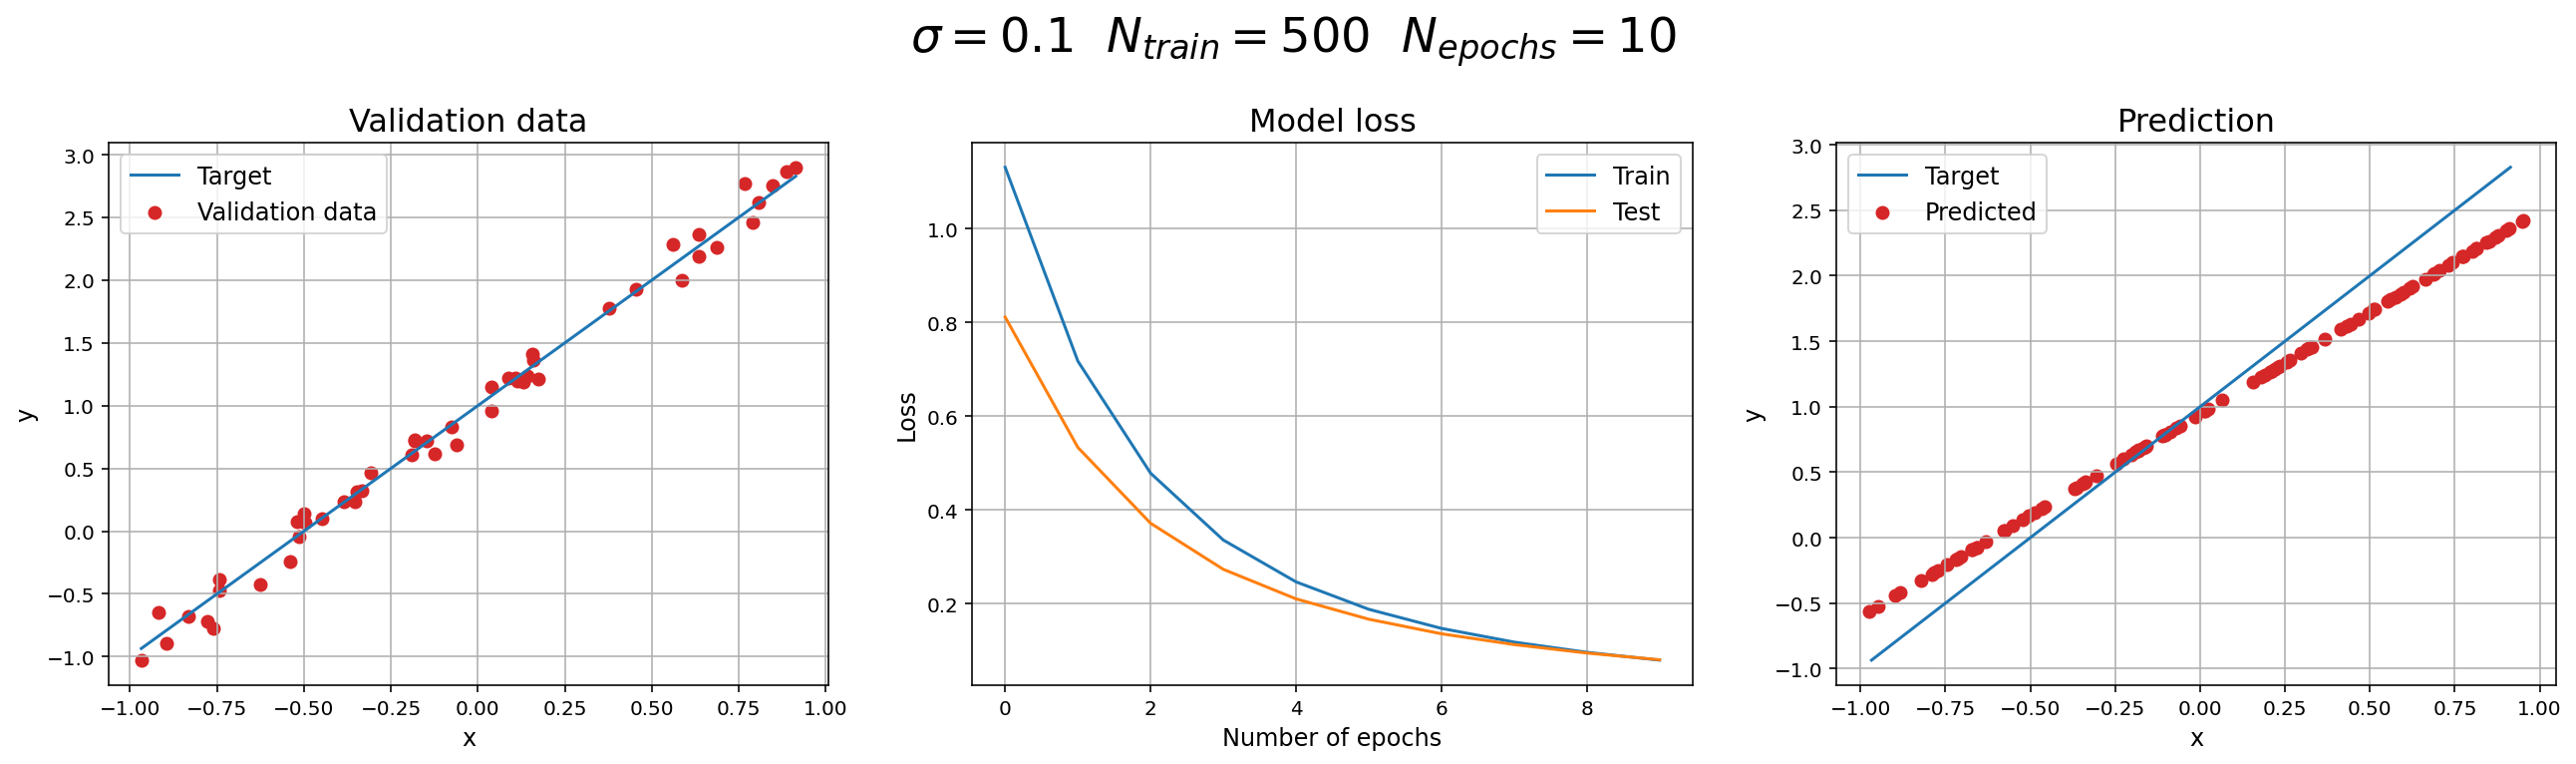

Fit parameters f(x) = mx+b
  m = 1.5491775
  b = 0.9472913

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0800589                        Test loss = 0.0604823
 Test accuracy = 0.0800589                    Test accuracy = 0.0604823




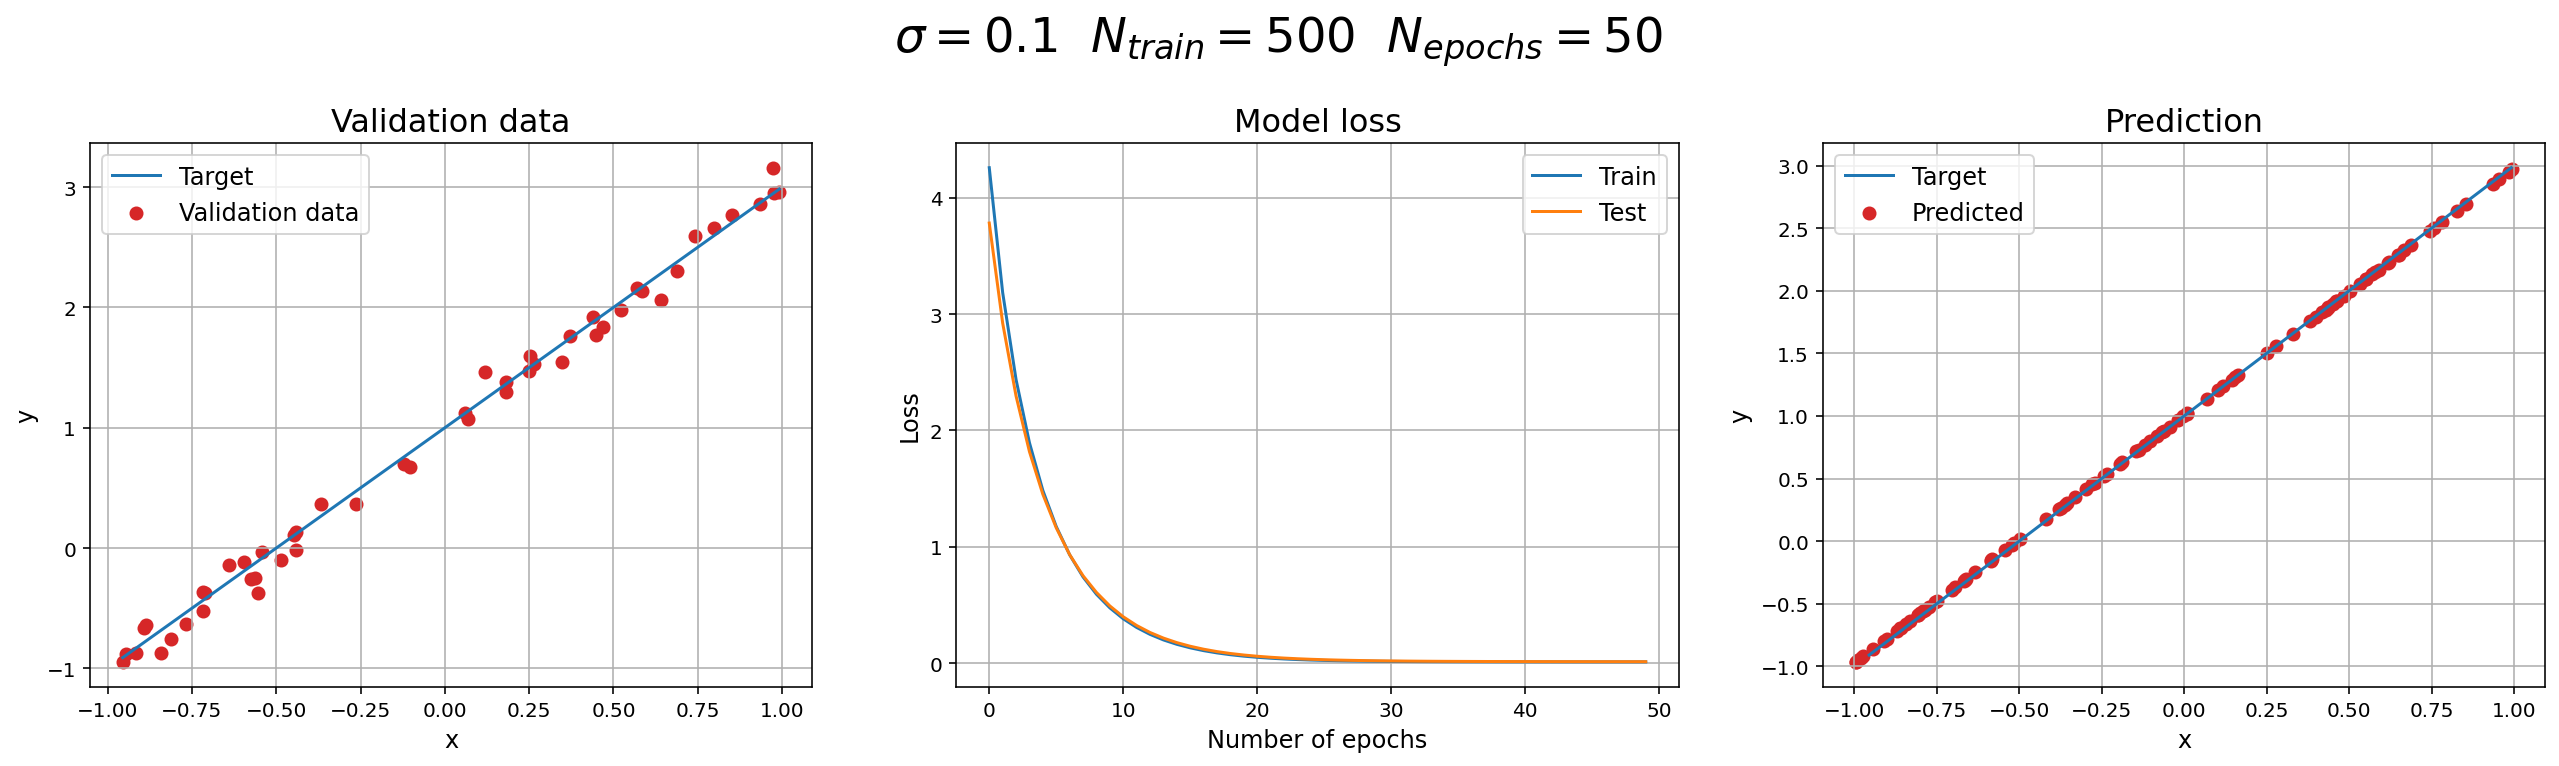

Fit parameters f(x) = mx+b
  m = 1.9767396
  b = 1.0030742

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0119556                        Test loss = 0.0002271
 Test accuracy = 0.0119556                    Test accuracy = 0.0002271




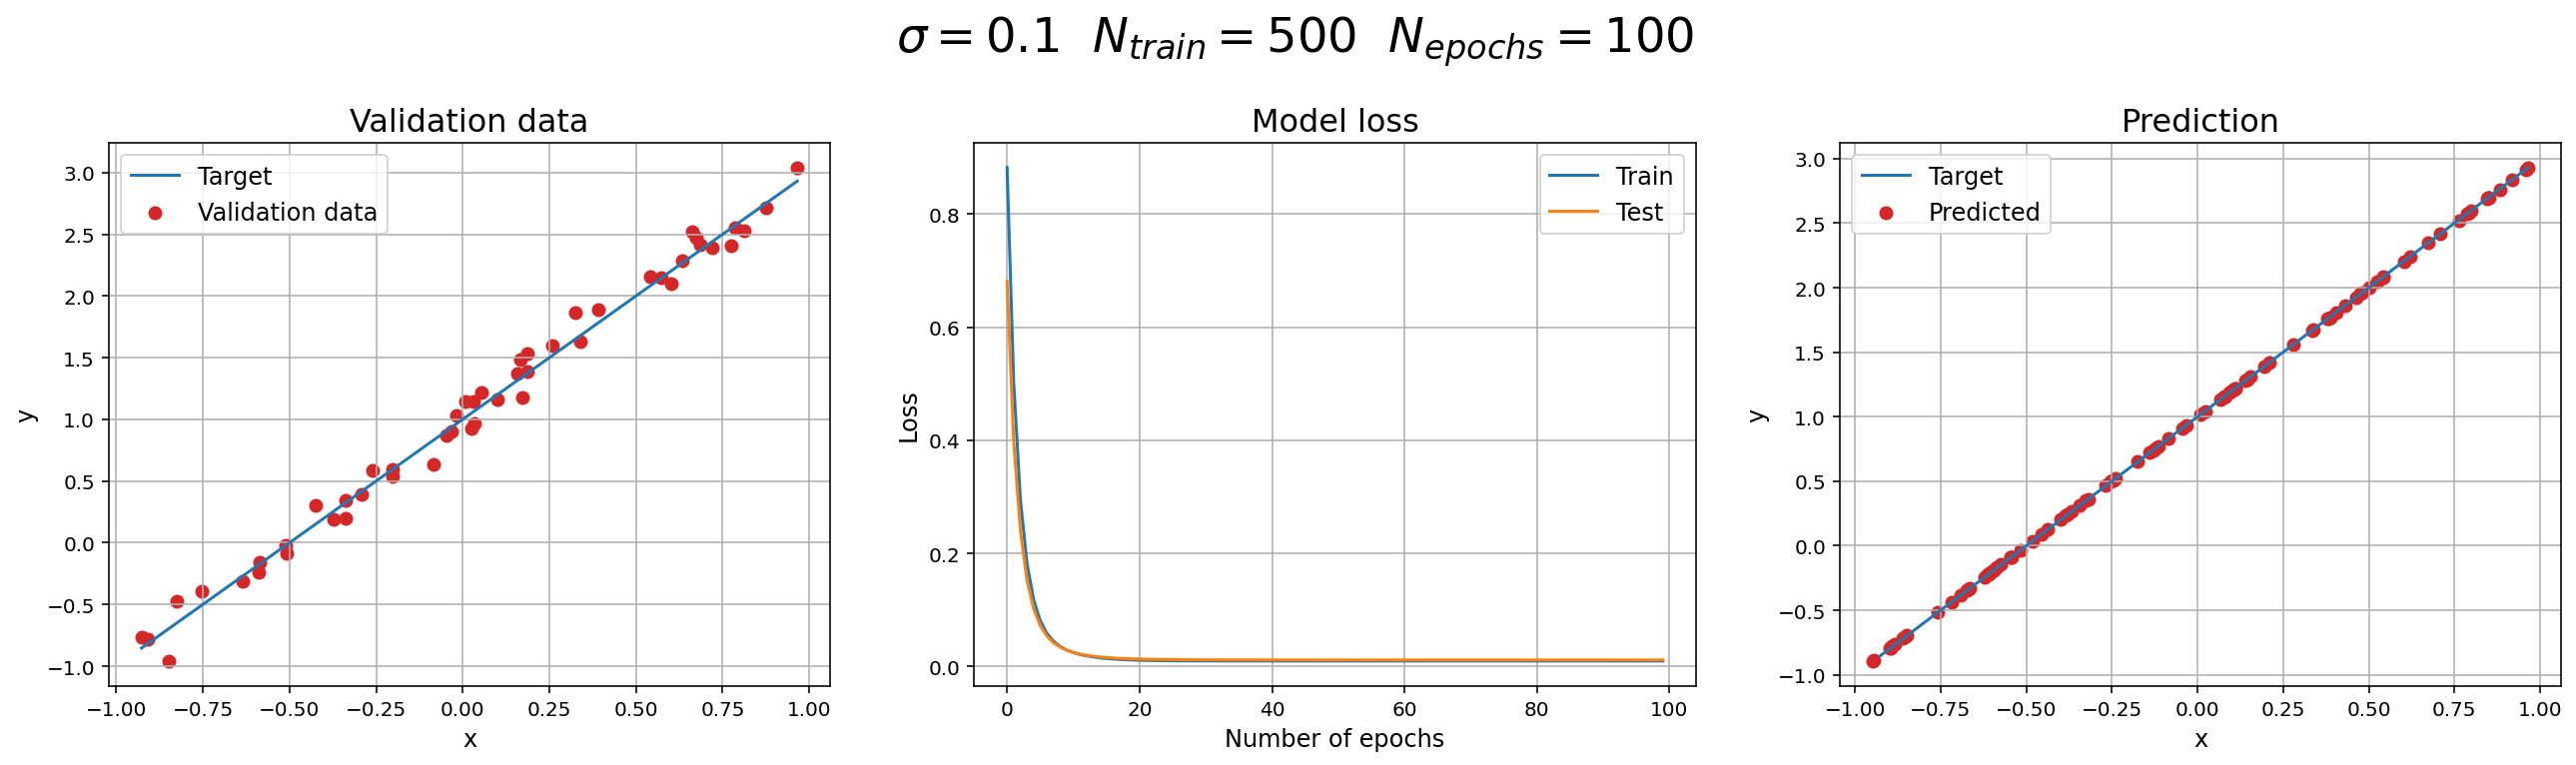

Fit parameters f(x) = mx+b
  m = 1.9953206
  b = 0.9994897

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0113256                        Test loss = 0.0000064
 Test accuracy = 0.0113256                    Test accuracy = 0.0000064



In [4]:
print('===================================================================================================================')
N_epochs_list = [10, 50, 100]
for N_epochs in N_epochs_list:
    model(0.1, 500, N_epochs)

Se il numero di epoche è troppo basso la rete non viene sufficientemente allenata e il risultato ottenuto è poco preciso: si nota infatti una netta discrepanza tra la predizione della rete e la funzione da fittare.
Non si osserva invece una grande differenza nella funzione costo raggiunta dalla rete con 50 epoche e con 100 epoche. Un elevato numero di epoche non porta quindi a un miglioramento del modello, ma aumenta soltanto il costo computazionale.

Da ultimo variamo $N_{train}$, fissando $N_{epochs}=50$.

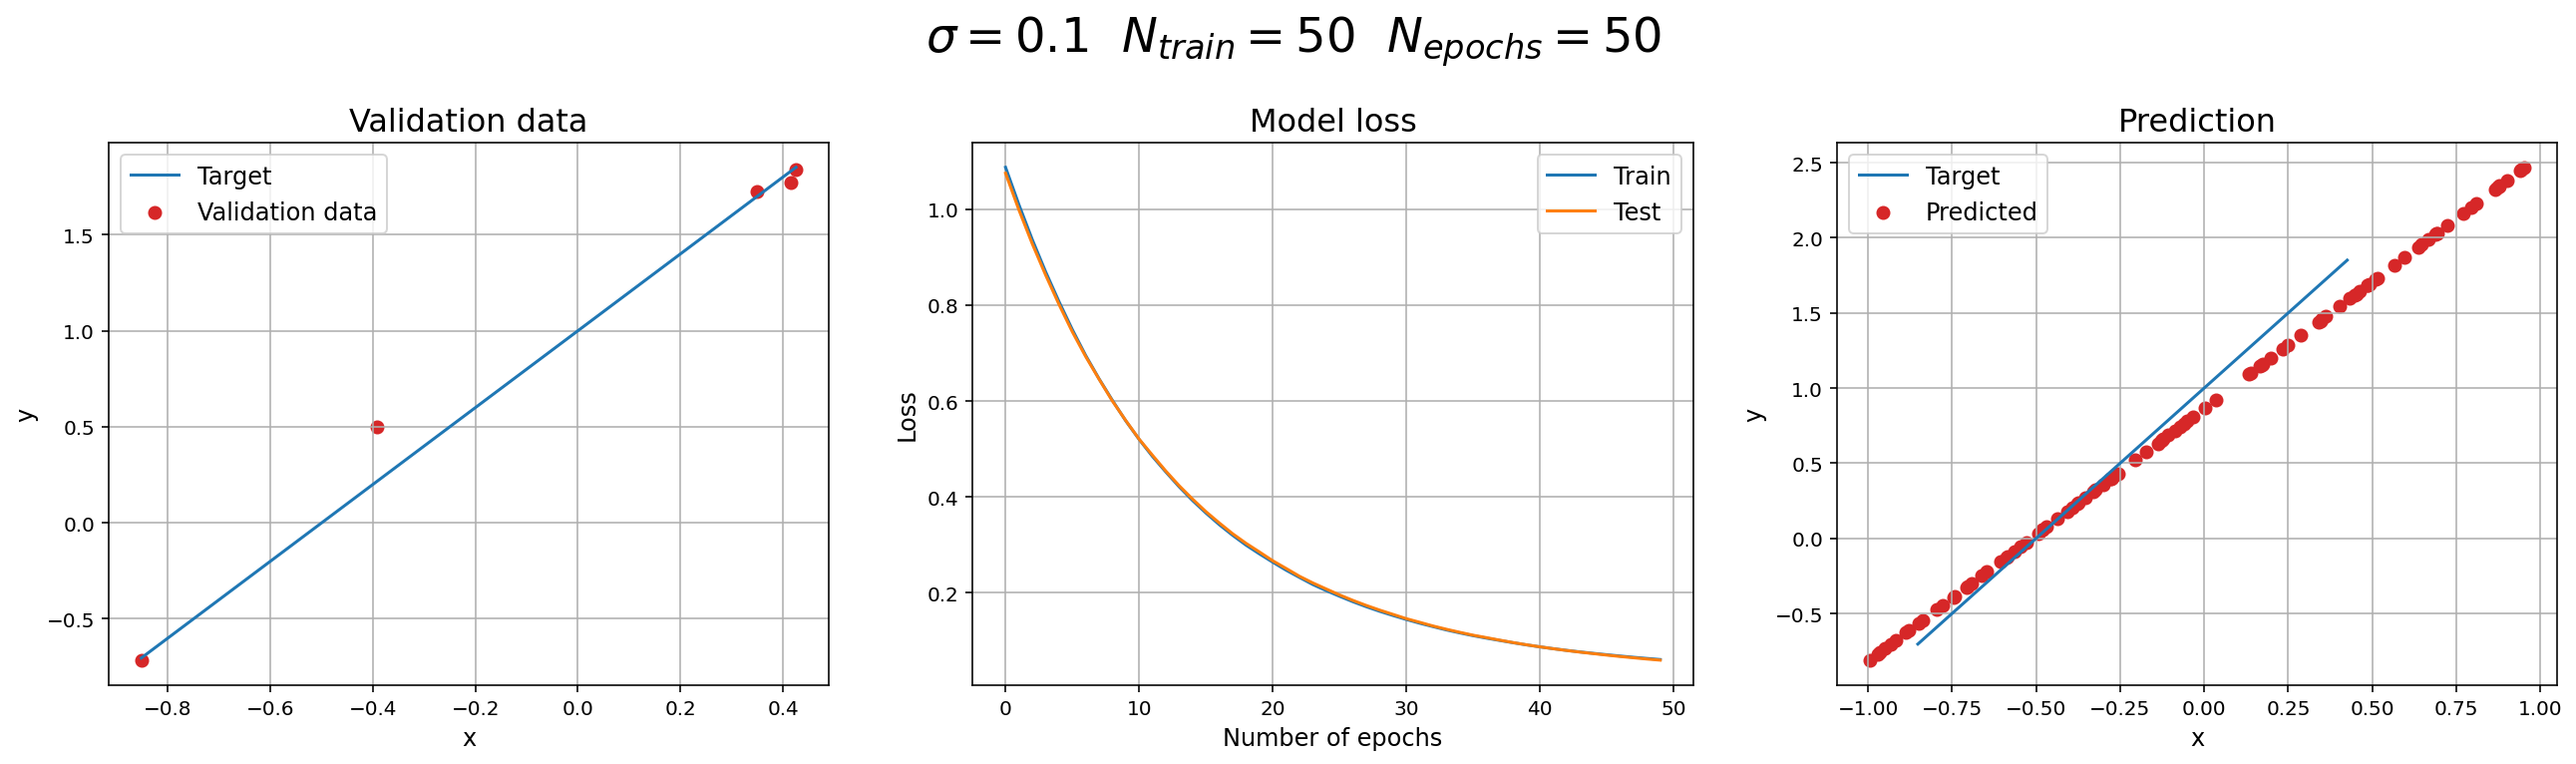

Fit parameters f(x) = mx+b
  m = 1.6839663
  b = 0.8649068

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0586299                        Test loss = 0.0444245
 Test accuracy = 0.0586299                    Test accuracy = 0.0444245




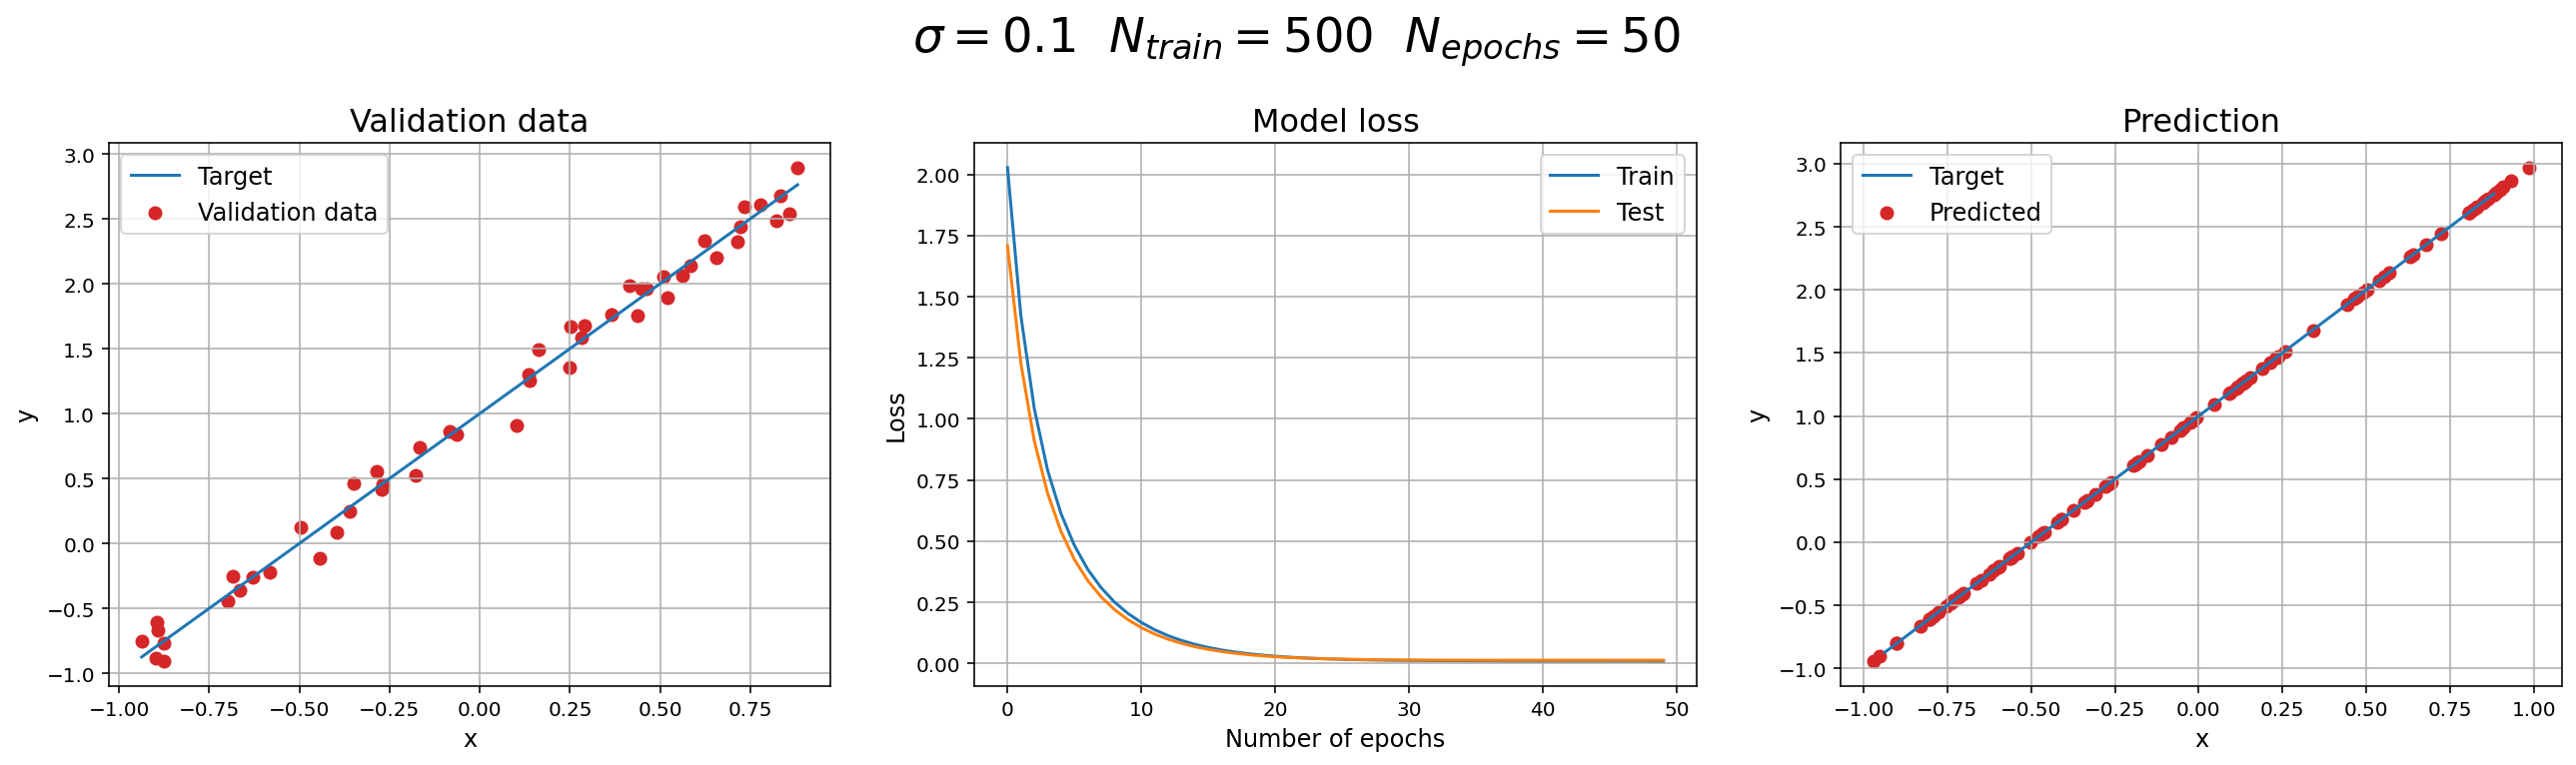

Fit parameters f(x) = mx+b
  m = 1.998323
  b = 0.9976357

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0127208                        Test loss = 0.0000068
 Test accuracy = 0.0127208                    Test accuracy = 0.0000068




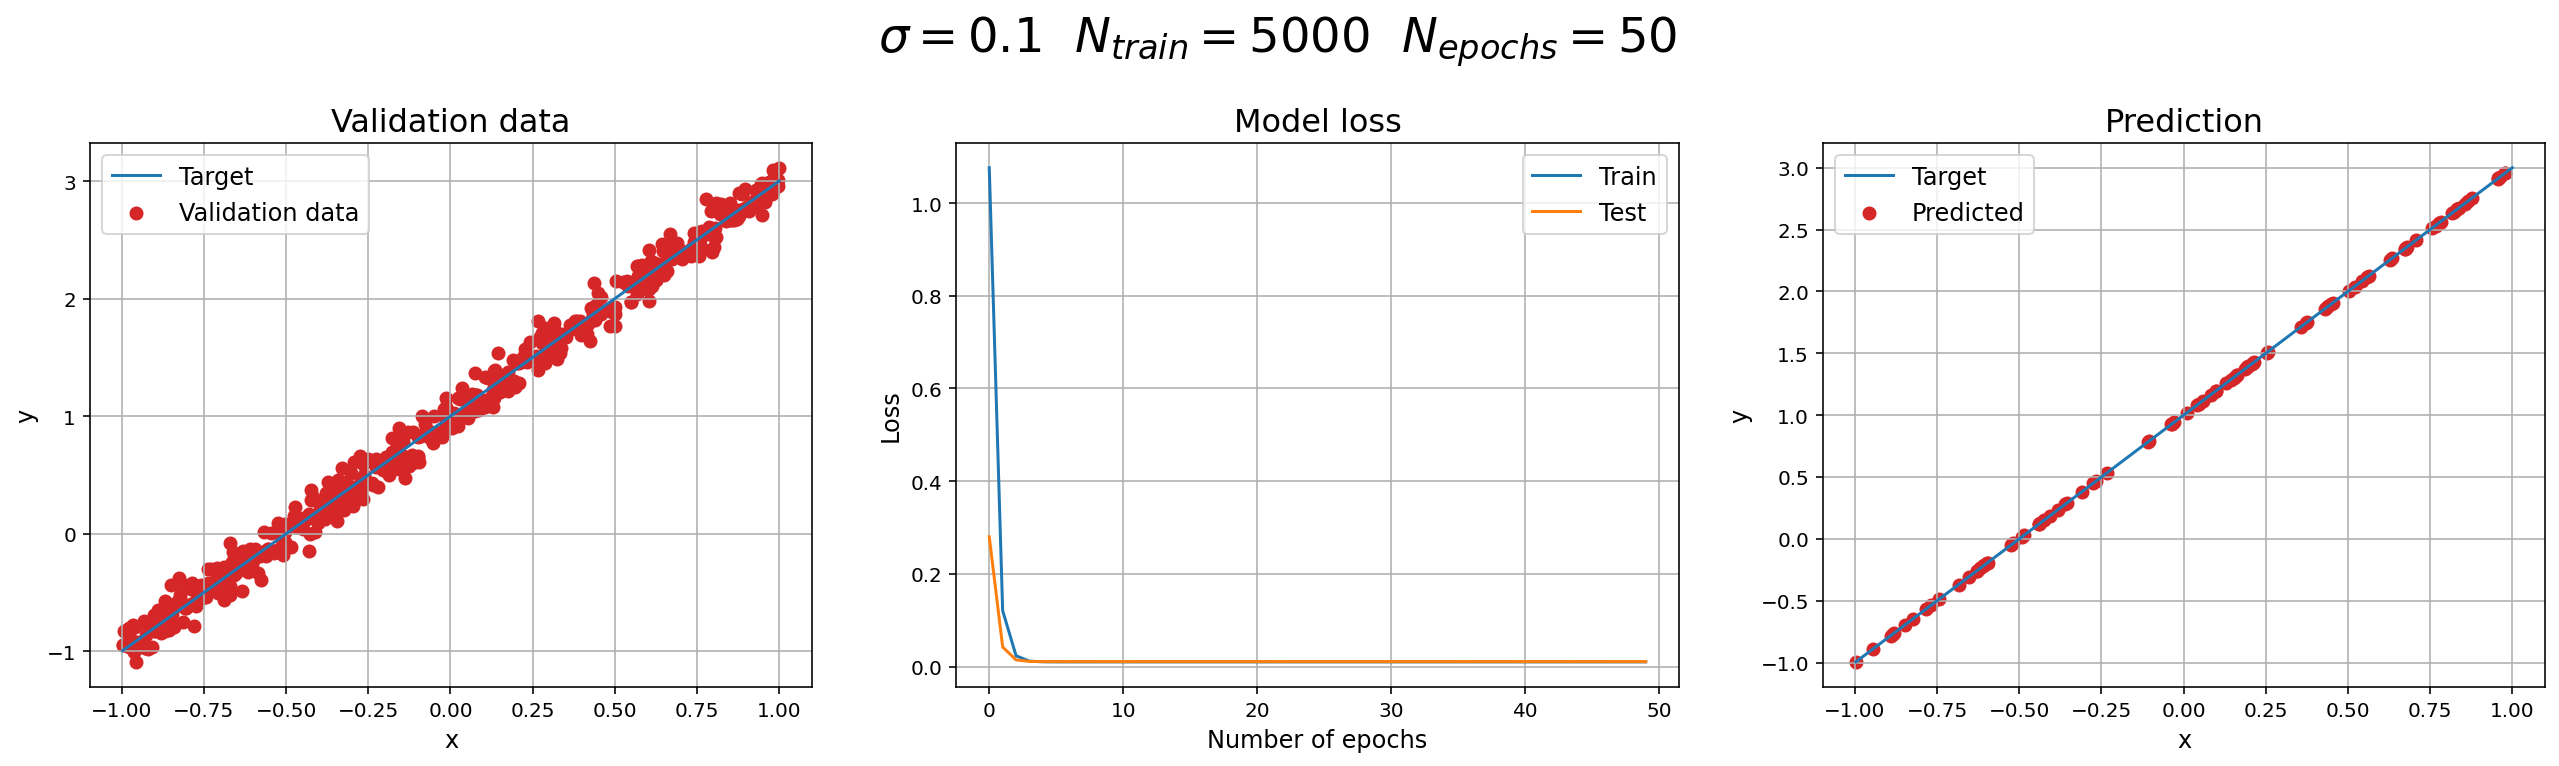

Fit parameters f(x) = mx+b
  m = 1.9987948
  b = 0.9988833

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0105616                        Test loss = 0.0000017
 Test accuracy = 0.0105616                    Test accuracy = 0.0000017



In [5]:
print('===================================================================================================================')
N_train_list = [50, 500, 5000]
for N_train in N_train_list:
    model(0.1, N_train, 50)

Come ci si poteva aspettare, all'aumentare del numero dei dati di training aumenta la performance della rete. Per piccoli valori di $N_{train}$ si ottiene un pessimo risultato: sono infatti necessarie molte epoche (almeno 200) per ottenere un buon risultato; tuttavia con un numero così elevato di epoche è anche maggiore il rischio di overfitting. In realtà nel caso di questa semplice rete con un singolo neurone tendenzialmente non si incorre nel problema di overfitting.

Basandoci su questo semplice problema, possiamo quindi affermare che il modo migliore per aumentare l'accuratezza della rete è aumentare il numero di dati di training.

### Esercizio 11.2

Lo scopo di questo esercizio è quello di eseguire un fit di dati campionati secondo la seguente funzione polinomiale di terzo grado

$$f(x)=4-3x-2x^2+3x^3$$

per $x \in [-1,1]$. Ai dati viene sempre aggiunto un rumore Gaussiano con deviazione standard $\sigma = 0.1$. Non trattandosi più di una funzione lineare sarà necessario utilizzare una rete neurale più elaborata, aumentando il numero di layer e il numero di neuroni in ogni layer. Per cominciare consideriamo tre configurazioni possibili della rete in modo tale che il numero totale di parametri della rete sia lo stesso: così facendo possiamo determinare la struttura più efficiente. Per tutti e tre i casi vengono utilizzati i seguenti parametri: $10000$ dati di training, $50$ epoche, <i>Relu</i> come funzione di attivazione, <i>SGD</i> come ottimizzatore e <i>MSE</i> come funzione costo.

Per ogni rete neurale vengono riportati due grafici: il primo mostra l'andamento della funzione costo all'aumentare del numero di epoche sia per i dati di training che di validazione; il secondo mostra la predizione della rete nell'intervallo di training.

In [26]:
def f(x):
    return 4-3*x-2*x**2+3*x**3

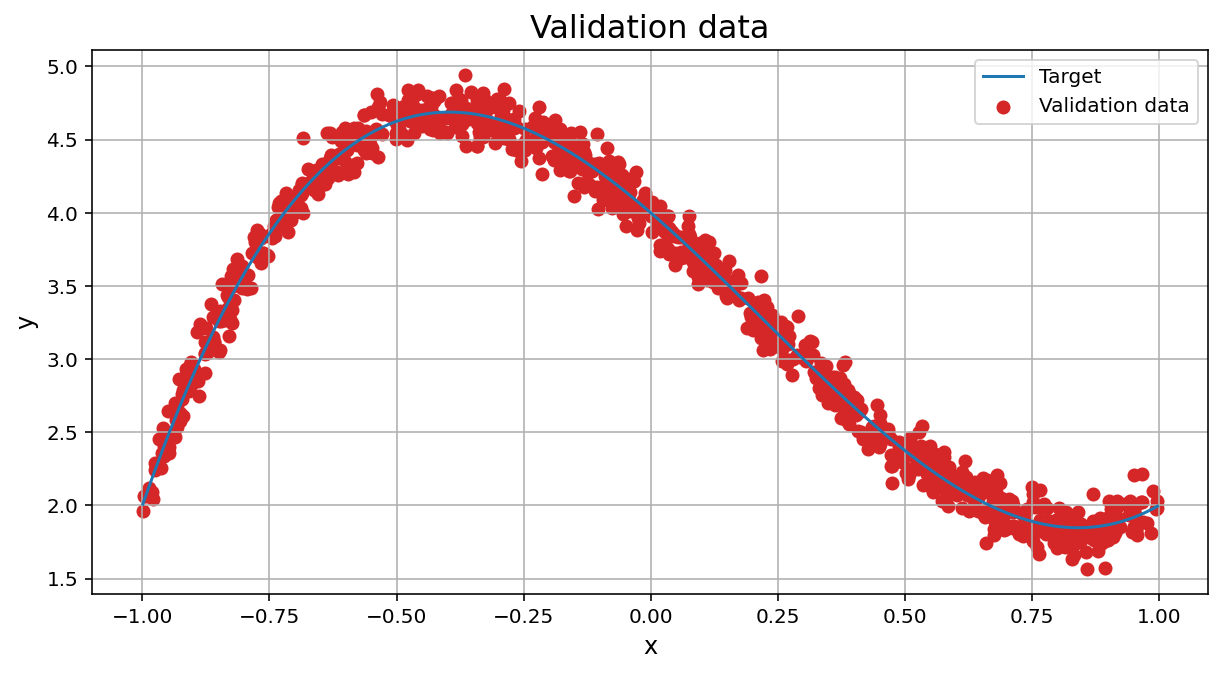

In [7]:
N_train = 10000
sigma = 0.1
N_epochs = 50

x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, int(N_train/10))
x_valid.sort()
y_target = f(x_valid) # ideal (target) function
    
y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

fig = plt.figure(figsize=(10, 5))
plt.plot(x_valid, y_target, label='Target', color='tab:blue')
plt.scatter(x_valid, y_valid, color='tab:red', label='Validation data')
plt.title('Validation data', fontsize=16)
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()
plt.grid(True)

In [8]:
def graph(model):
    
    ### model.summary()
    
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
    
    fig, ax = plt.subplots(1,2, figsize=(18,6))
    
    ax[0].plot(history.history['loss'], color='tab:blue')
    ax[0].plot(history.history['val_loss'], color='tab:orange')
    ax[0].set_title('Model loss', fontsize=16)
    ax[0].set_ylabel('Loss', fontsize=12)
    ax[0].set_xlabel('Number of epochs', fontsize=12)
    ax[0].legend(['Train', 'Test'], loc='best', fontsize=12)
    ax[0].grid(True)
    
    #x_predicted = np.random.uniform(-1.5, 1.5, 100)
    x_predicted = np.linspace(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    x = np.linspace(-1, 1, 100)
    y = f(x)
    ax[1].scatter(x_predicted, y_predicted, color='tab:red', label='Predicted')
    #ax[2].plot(x_valid, y_target)
    ax[1].plot(x, y, color='tab:blue', label='Target')
    ax[1].set_title('Prediction', fontsize=16)
    ax[1].set_ylabel('y', fontsize=12)
    ax[1].set_xlabel('x', fontsize=12)
    ax[1].legend(loc='best', fontsize=12)
    ax[1].grid(True)

    plt.show()
    
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # evaluate model with the exact curve
    score_ex_cur = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print('Evaluate model with valid set                Evaluate model with exact curve')
    print(' Test loss =', "{:.7f}".format(score[0]), '                       Test loss =', "{:.7f}".format(score_ex_cur[0]))
    print(' Test accuracy =', "{:.7f}".format(score[1]), '                   Test accuracy =', "{:.7f}".format(score_ex_cur[1]))
    
    print()

#### Struttura 1: (1, 83, 1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 83)                166       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 84        
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


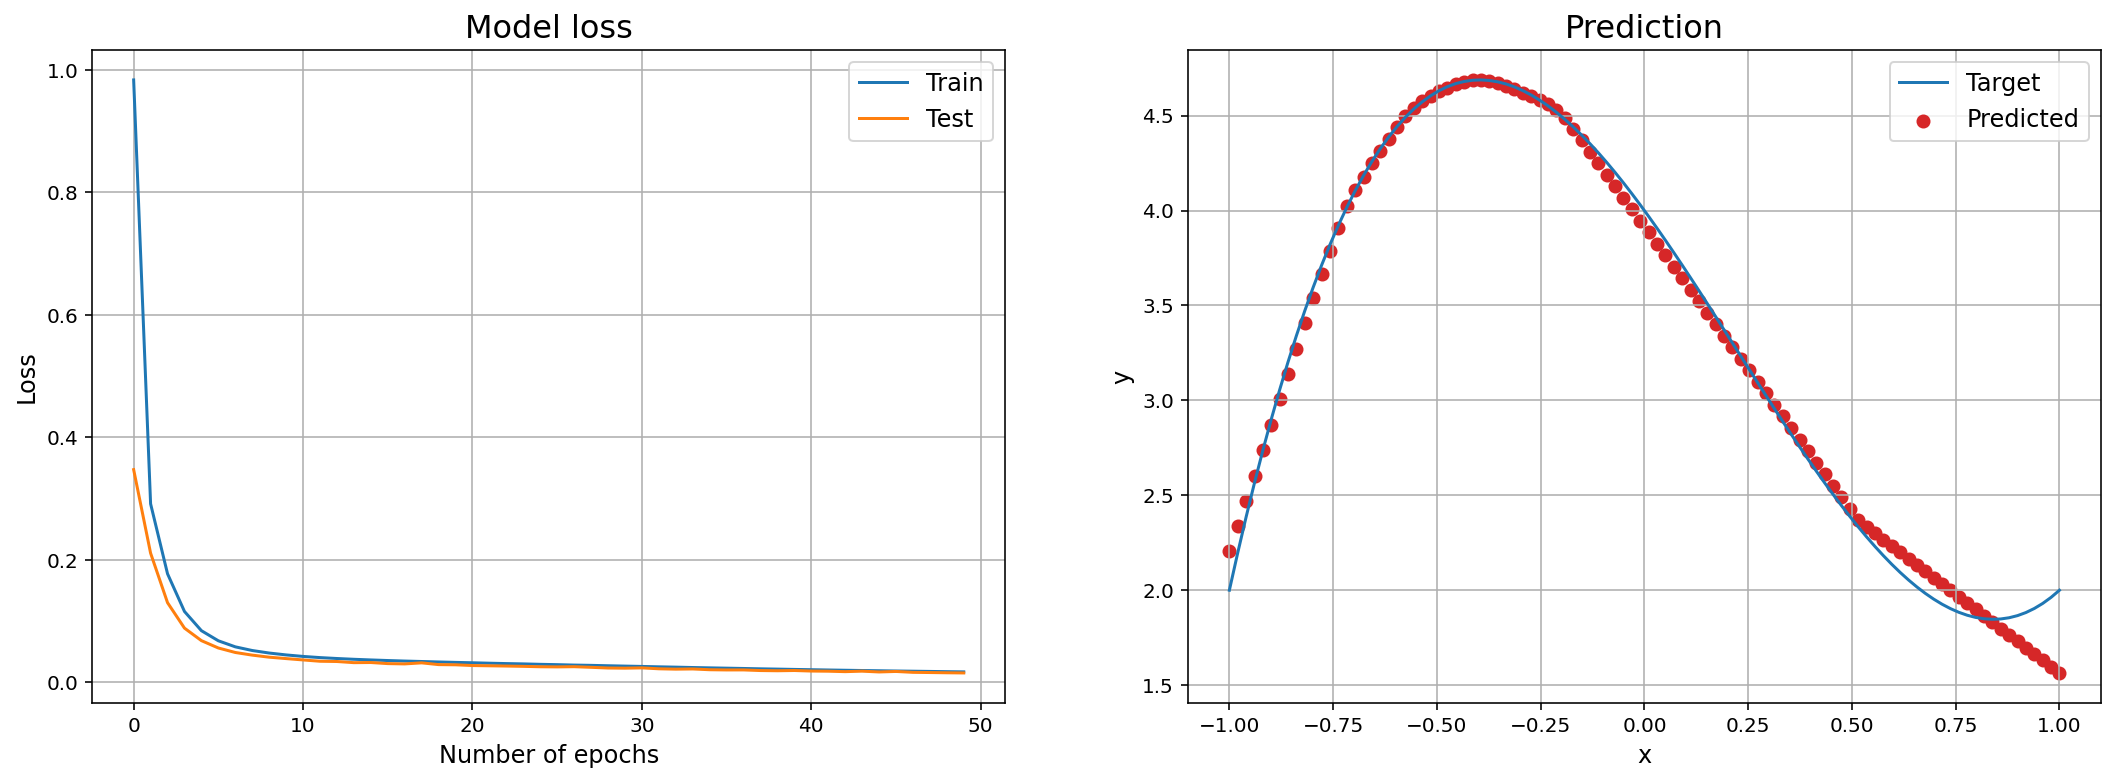

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0155853                        Test loss = 0.0058757
 Test accuracy = 0.0155853                    Test accuracy = 0.0058757



In [9]:
model1 = tf.keras.Sequential()
model1.add(Dense(83, input_shape=(1,), activation='relu'))
model1.add(Dense(1, activation='relu'))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

graph(model1)

#### Struttura 2: (1, 16, 12, 1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_12 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 13        
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


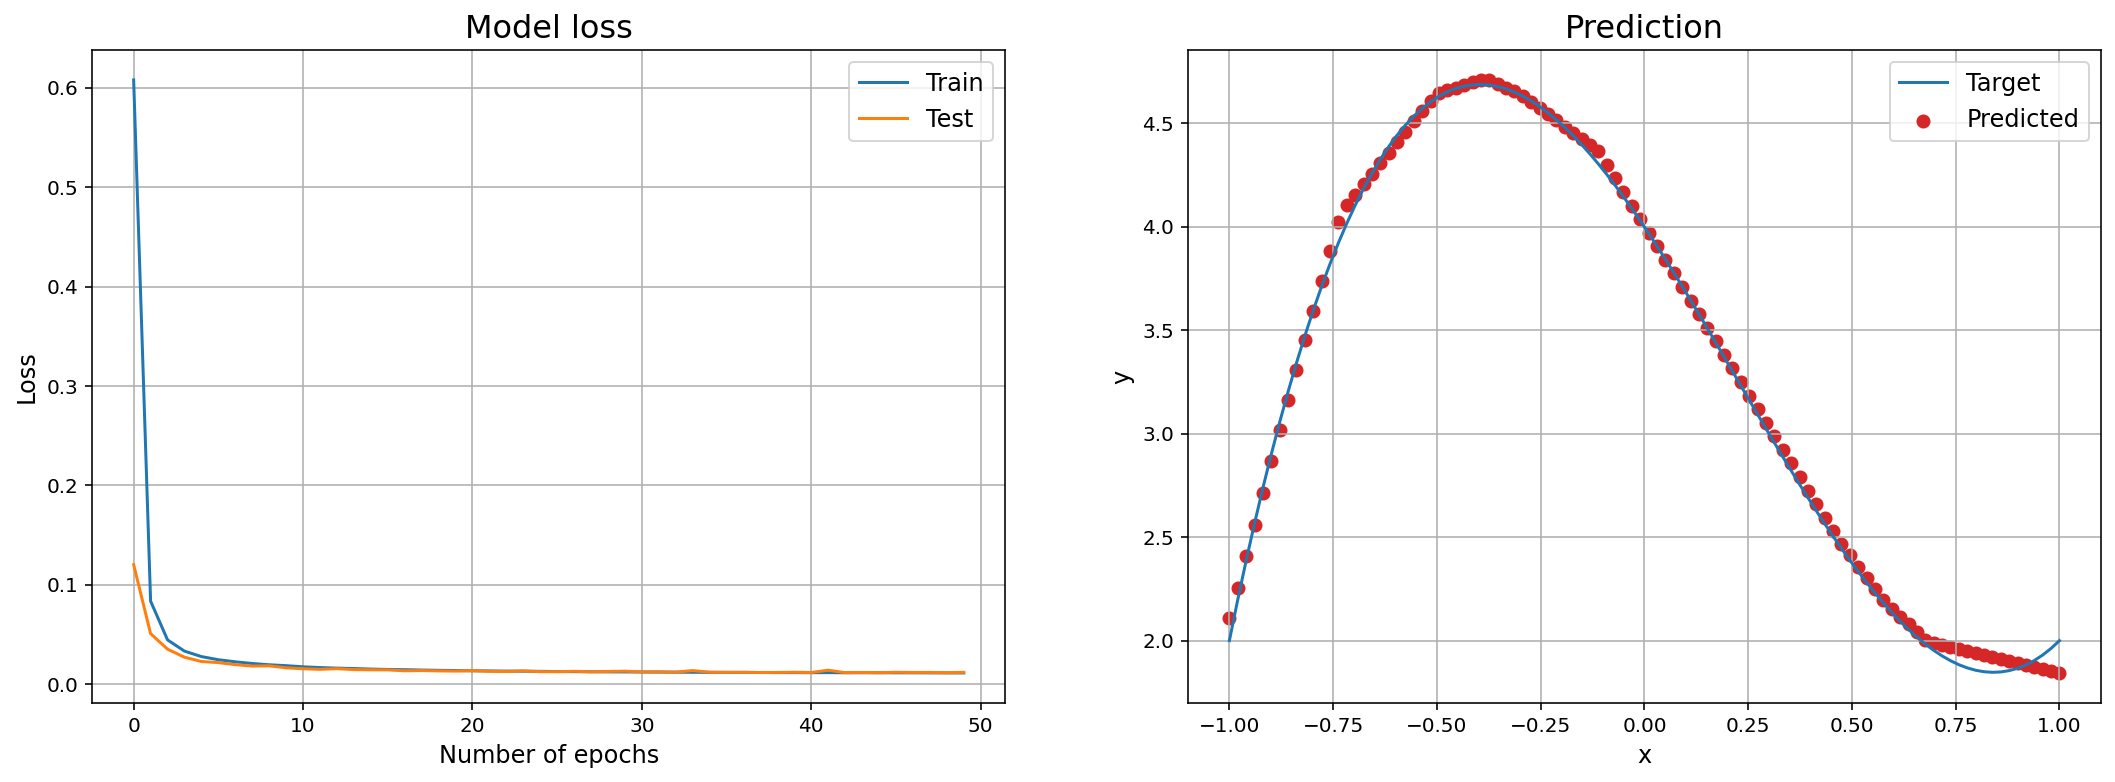

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0118127                        Test loss = 0.0013953
 Test accuracy = 0.0118127                    Test accuracy = 0.0013953



In [10]:
model2 = tf.keras.Sequential()
model2.add(Dense(16, input_shape=(1,), activation='relu'))
model2.add(Dense(12, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()

graph(model2)

#### Struttura 3: (1, 13, 9, 9, 1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 13)                26        
_________________________________________________________________
dense_19 (Dense)             (None, 9)                 126       
_________________________________________________________________
dense_20 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 10        
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________


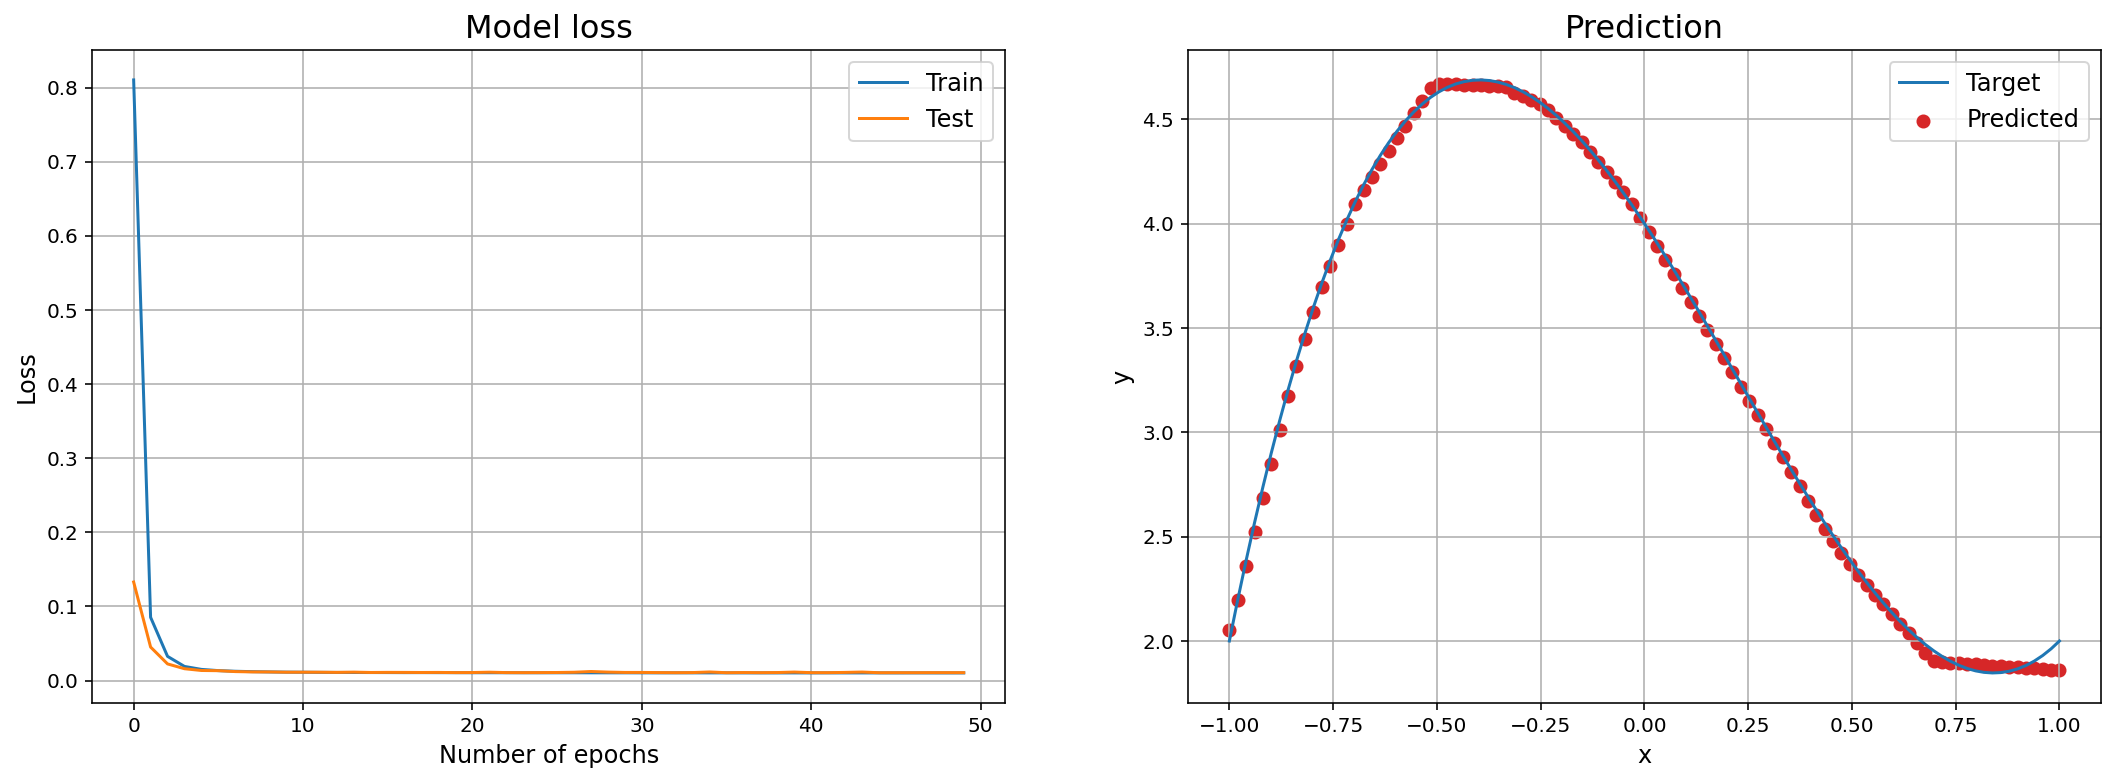

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0106880                        Test loss = 0.0006683
 Test accuracy = 0.0106880                    Test accuracy = 0.0006683



In [12]:
model3 = tf.keras.Sequential()
model3.add(Dense(13, input_shape=(1,), activation='relu'))
model3.add(Dense(9, activation='relu'))
model3.add(Dense(9, activation='relu'))
model3.add(Dense(1, activation='relu'))
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.summary()

graph(model3)

In tutti e tre i casi il valore finale della funzione costo è sempre dello stesso ordine di grandezza ed è compatibile con la nostra scelta di $\sigma$, in quanto $\sigma^2=0.01$. La terza struttura è quella che presenta il valore finale della funzione costo finale più basso sia quando viene valutata sui dati di validazione che sulla funzione modello. Quindi, d'ora in avanti, useremo una struttura costituita da 3 layer nascosti. <br>
Inoltre notiamo che, nonostante la funzione di attivazione <i>Relu</i> sia lineare a tratti e la funzione da fittare sia ondulata, in generale la rete predice dei buoni risultati all'interno dell'intervallo di training in tutti e tre i casi; tuttavia, nelle zone in cui la derivata cambia di segno, la rete non riesce a predirre bene l'andamento della funzione modello, in particolare nella zona all'estremo destro dell'intervallo di training. Oltre alla forma della funzione di attivazione, questo è anche dovuto al rumore Gaussiano presente nei dati, per cui in tale zona risulta difficile individuare da quale funzione siano stati estratti i dati; infatti, in assenza di rumore ($\sigma=0$) questo problema non risulta più essere presente.

Proviamo ora a variare il numero di parametri della rete: vogliamo vedere che relazione ci sia tra la complessità del modello e la performance della rete. Iniziamo aumentando i neuroni in ciascun layer, in modo da aumentare il numero di parametri. Successivamente proviamo a ridurre il numero di neuroni per layer, riducendo di conseguenza il numero dei parametri.

#### Struttura 4: (1, 18, 15, 12, 1)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 18)                36        
_________________________________________________________________
dense_23 (Dense)             (None, 15)                285       
_________________________________________________________________
dense_24 (Dense)             (None, 12)                192       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 13        
Total params: 526
Trainable params: 526
Non-trainable params: 0
_________________________________________________________________


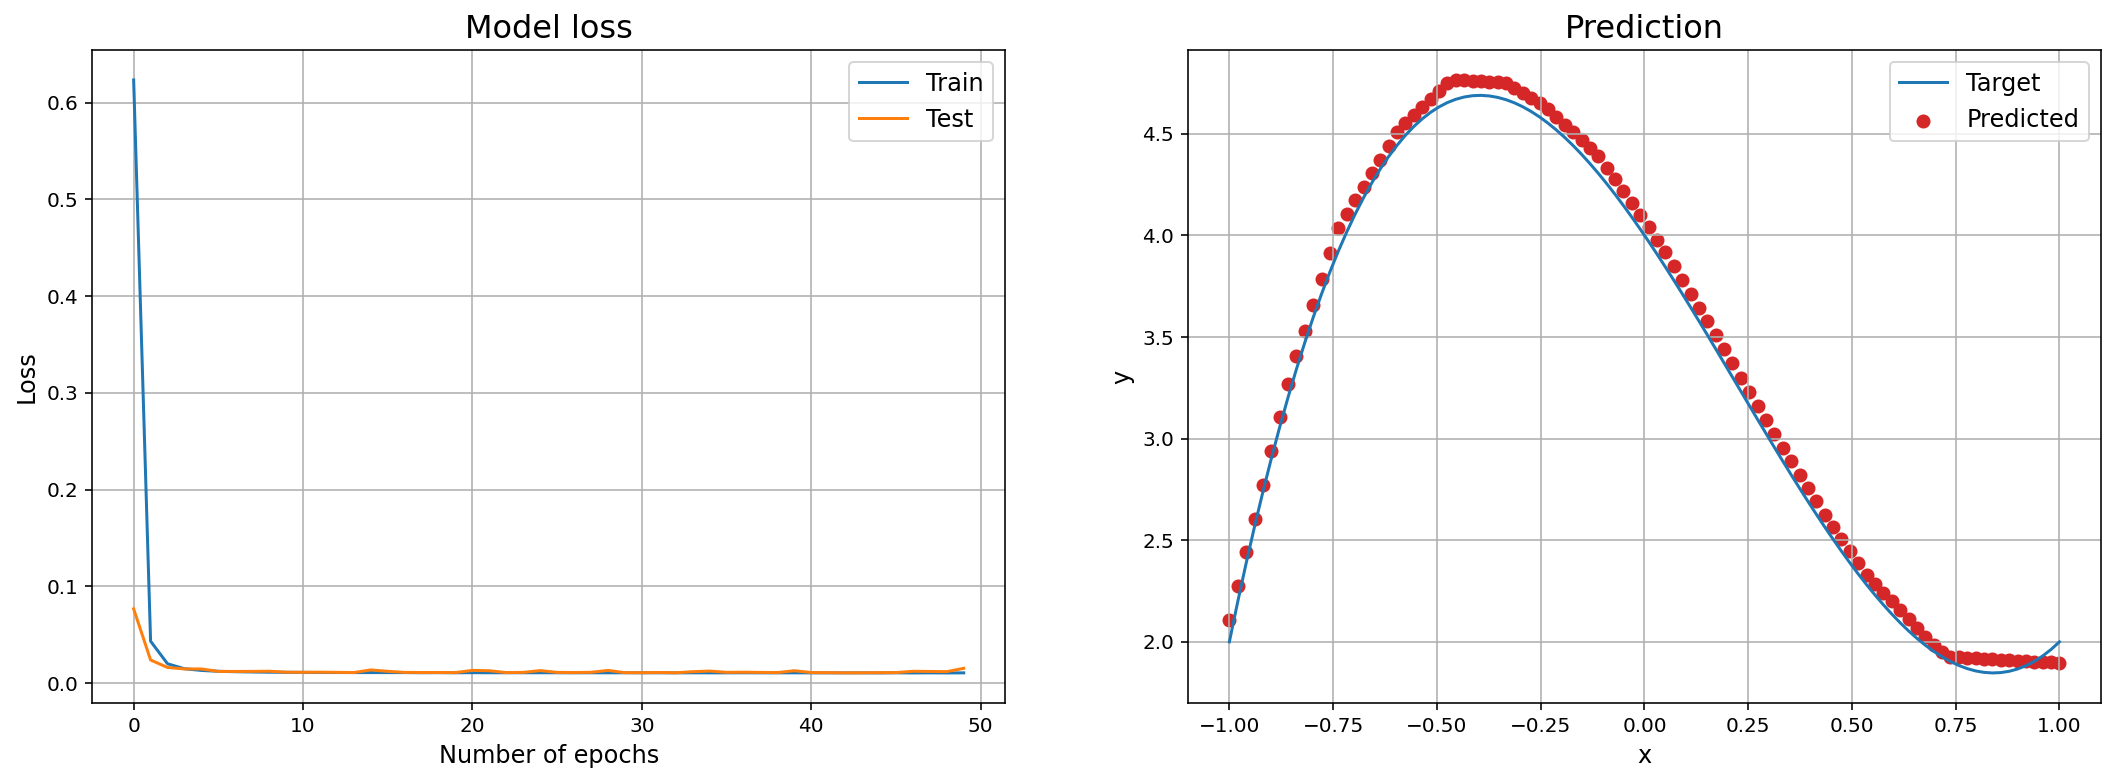

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0150979                        Test loss = 0.0042146
 Test accuracy = 0.0150979                    Test accuracy = 0.0042146



In [13]:
model4 = tf.keras.Sequential()
model4.add(Dense(18, input_shape=(1,), activation='relu'))
model4.add(Dense(15, activation='relu'))
model4.add(Dense(12, activation='relu'))
model4.add(Dense(1, activation='relu'))
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model4.summary()

graph(model4)

Nonostante il numero dei parametri della rete sia raddoppiato, i risultati ottenuti sono peggiori rispetto alla rete precedente: il valore finale della funzione costo è peggiorata sia valuntandola sui dati della validazione, sia sulla curva esatta.

#### Struttura 5: (1, 5, 4, 4, 1)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 5         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


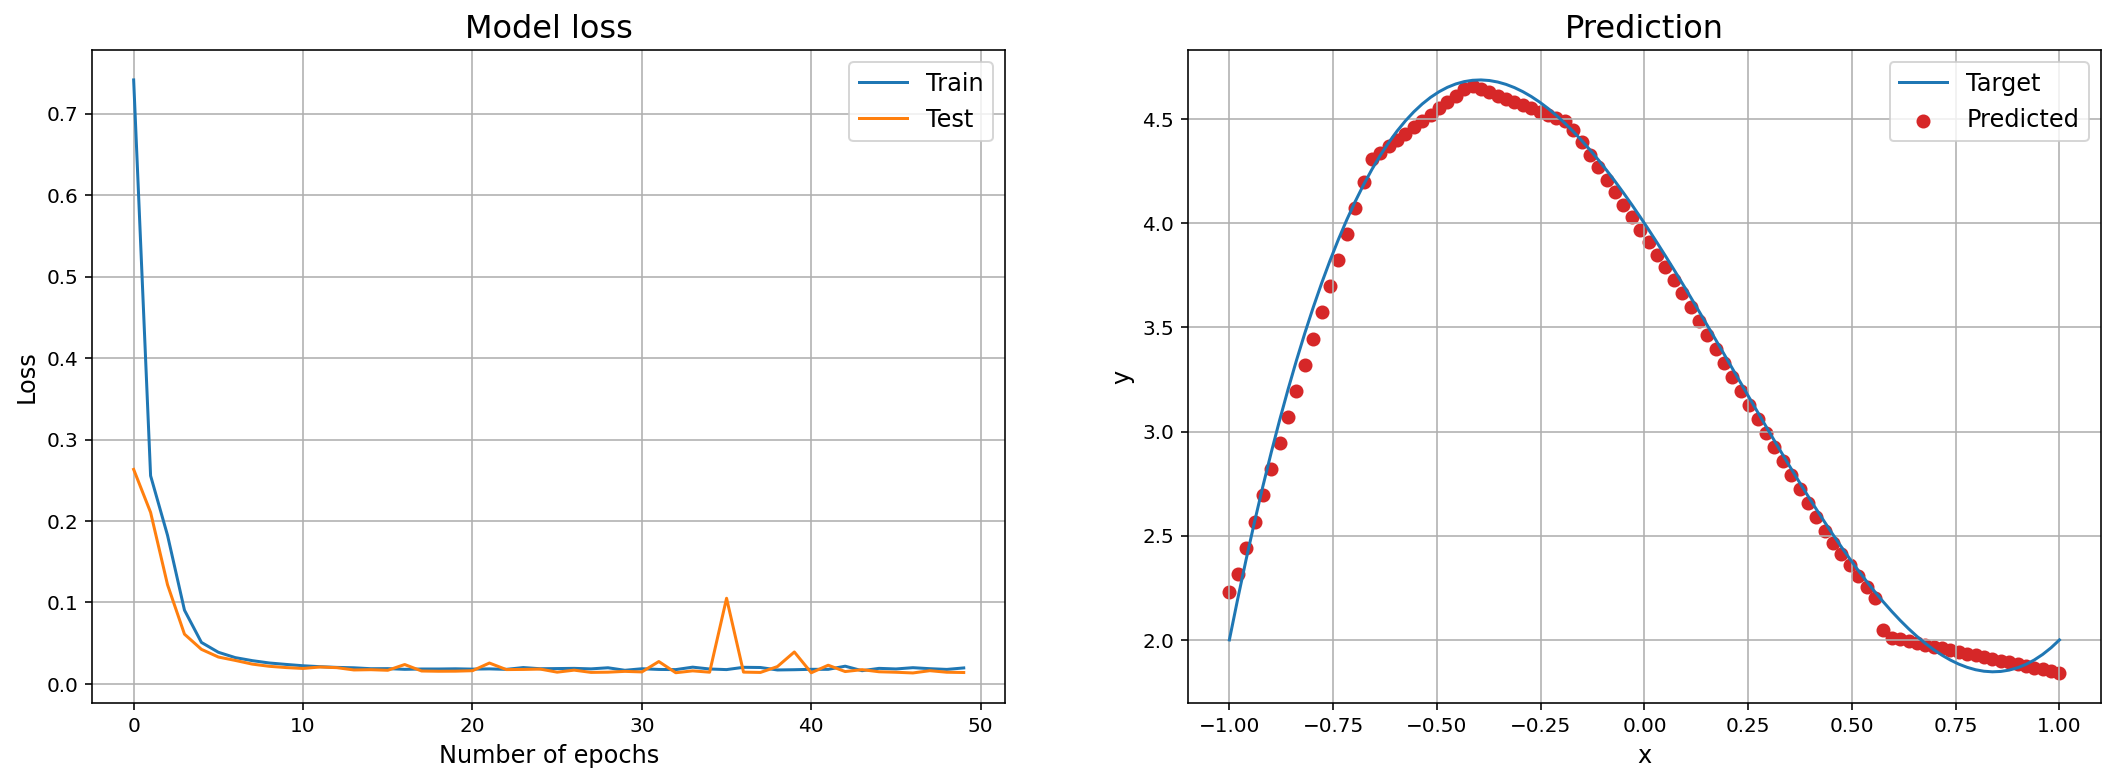

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0140434                        Test loss = 0.0041168
 Test accuracy = 0.0140434                    Test accuracy = 0.0041168



In [14]:
model5 = tf.keras.Sequential()
model5.add(Dense(5, input_shape=(1,), activation='relu'))
model5.add(Dense(4, activation='relu'))
model5.add(Dense(4, activation='relu'))
model5.add(Dense(1, activation='relu'))
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model5.summary()

graph(model5)

Riducendo il numero di parametri i risultati non sono ottimali: sebbene la funzione costo mantenga lo stesso ordine grandezza, assumendo un valore finale leggermente superiore ai casi precedenti, con così pochi parametri l'approssimazione della funzione modello tramite rette risulta molto spigolosa, soprattutto nelle regioni in prossimità di massimi e minimi locali. 

Per migliorare il fit nelle zone in cui la derivate cambia di segno potremmo utilizzare delle funzioni di attivazione che non siano lineari in tutto il loro dominio, come <i>Softplus</i> e <i>Selu</i>. Vediamo di seguito come cambia la performance della rete scegliendo diverse funzioni di attivazione.

#### Funzione di attivazione - Softplus

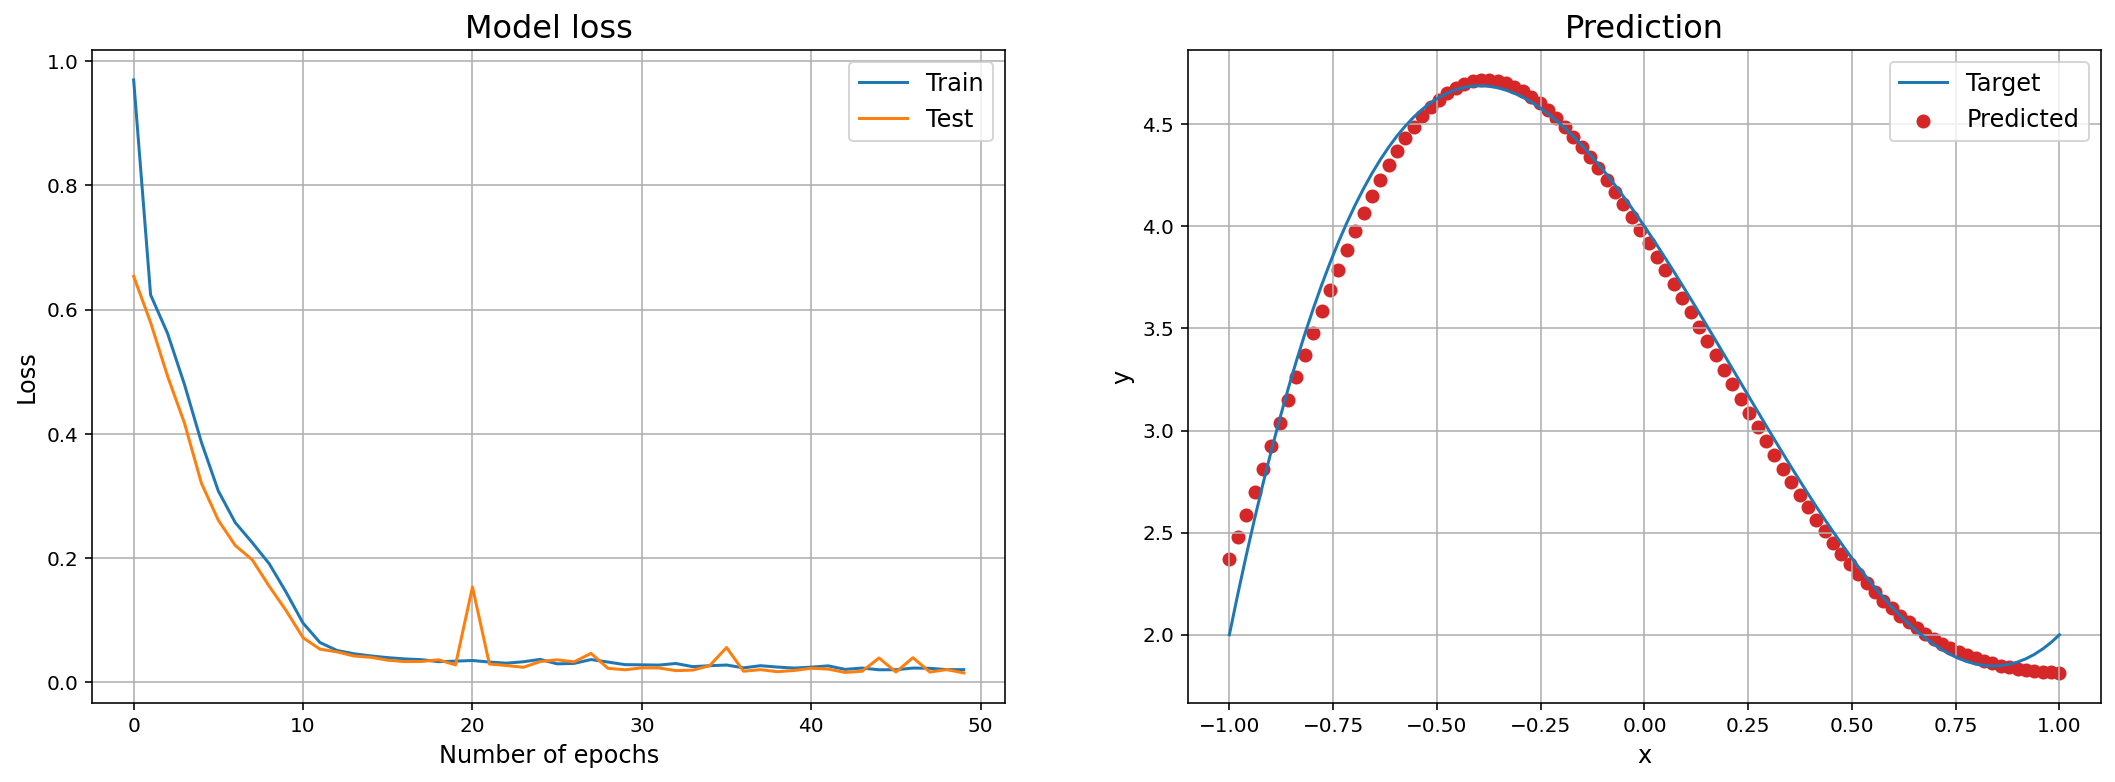

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0151547                        Test loss = 0.0053628
 Test accuracy = 0.0151547                    Test accuracy = 0.0053628



In [15]:
model6 = tf.keras.Sequential()
model6.add(Dense(13, input_shape=(1,), activation='softplus'))
model6.add(Dense(9, activation='softplus'))
model6.add(Dense(9, activation='softplus'))
model6.add(Dense(1, activation='softplus'))
model6.compile(optimizer='sgd', loss='mse', metrics=['mse'])

graph(model6)

L'andamento predetto dalla rete ha un aspetto più ondulato, tuttavia la convergenza è più lenta rispetto ai casi precedenti e il valore finale della funzione costo è superiore rispetto a quanto ottenuto in precedenza.

#### Funzione di attivazione - Selu

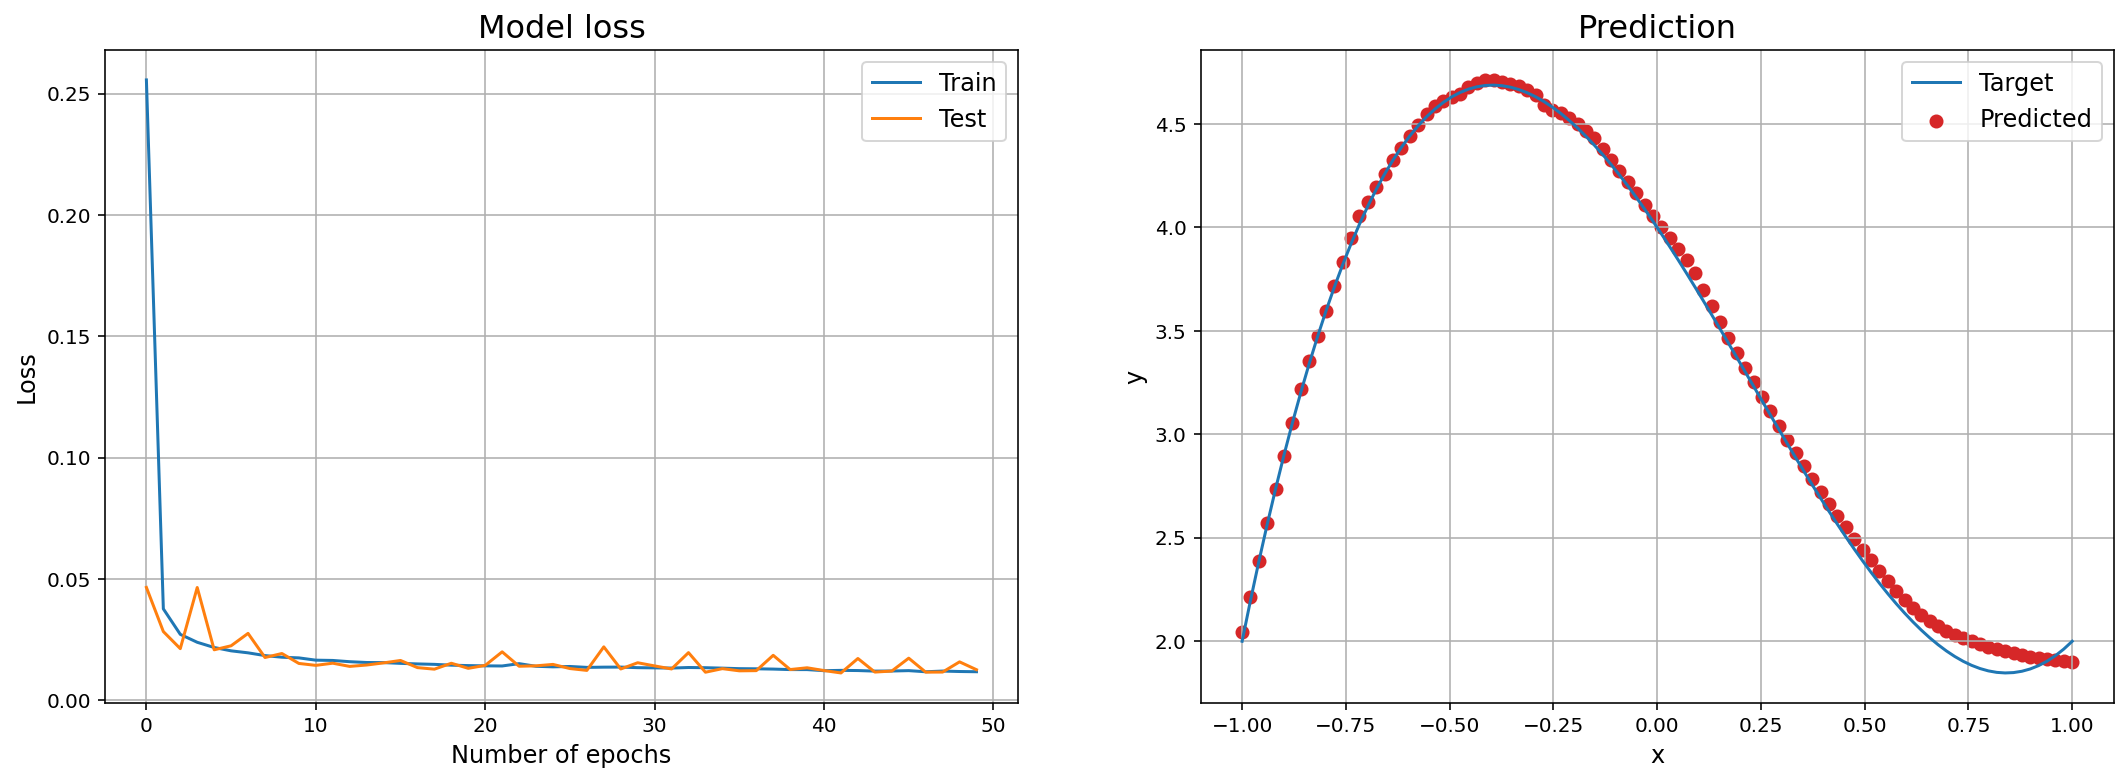

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0125705                        Test loss = 0.0022388
 Test accuracy = 0.0125705                    Test accuracy = 0.0022388



In [16]:
model7 = tf.keras.Sequential()
model7.add(Dense(13, input_shape=(1,), activation='selu'))
model7.add(Dense(9, activation='selu'))
model7.add(Dense(9, activation='selu'))
model7.add(Dense(1, activation='selu'))
model7.compile(optimizer='sgd', loss='mse', metrics=['mse'])

graph(model7)

Anche questa funzione di attivazione non migliora la performance della rete neurale. Di conseguenza, d'ora in avanti utilizzeremo <i>Relu</i> come funzione di attivazione.

Vediamo ora cosa succede cambiando ottimizzatore, utilizzando <i>Adam</i>.

#### Ottimizzatore - Adam

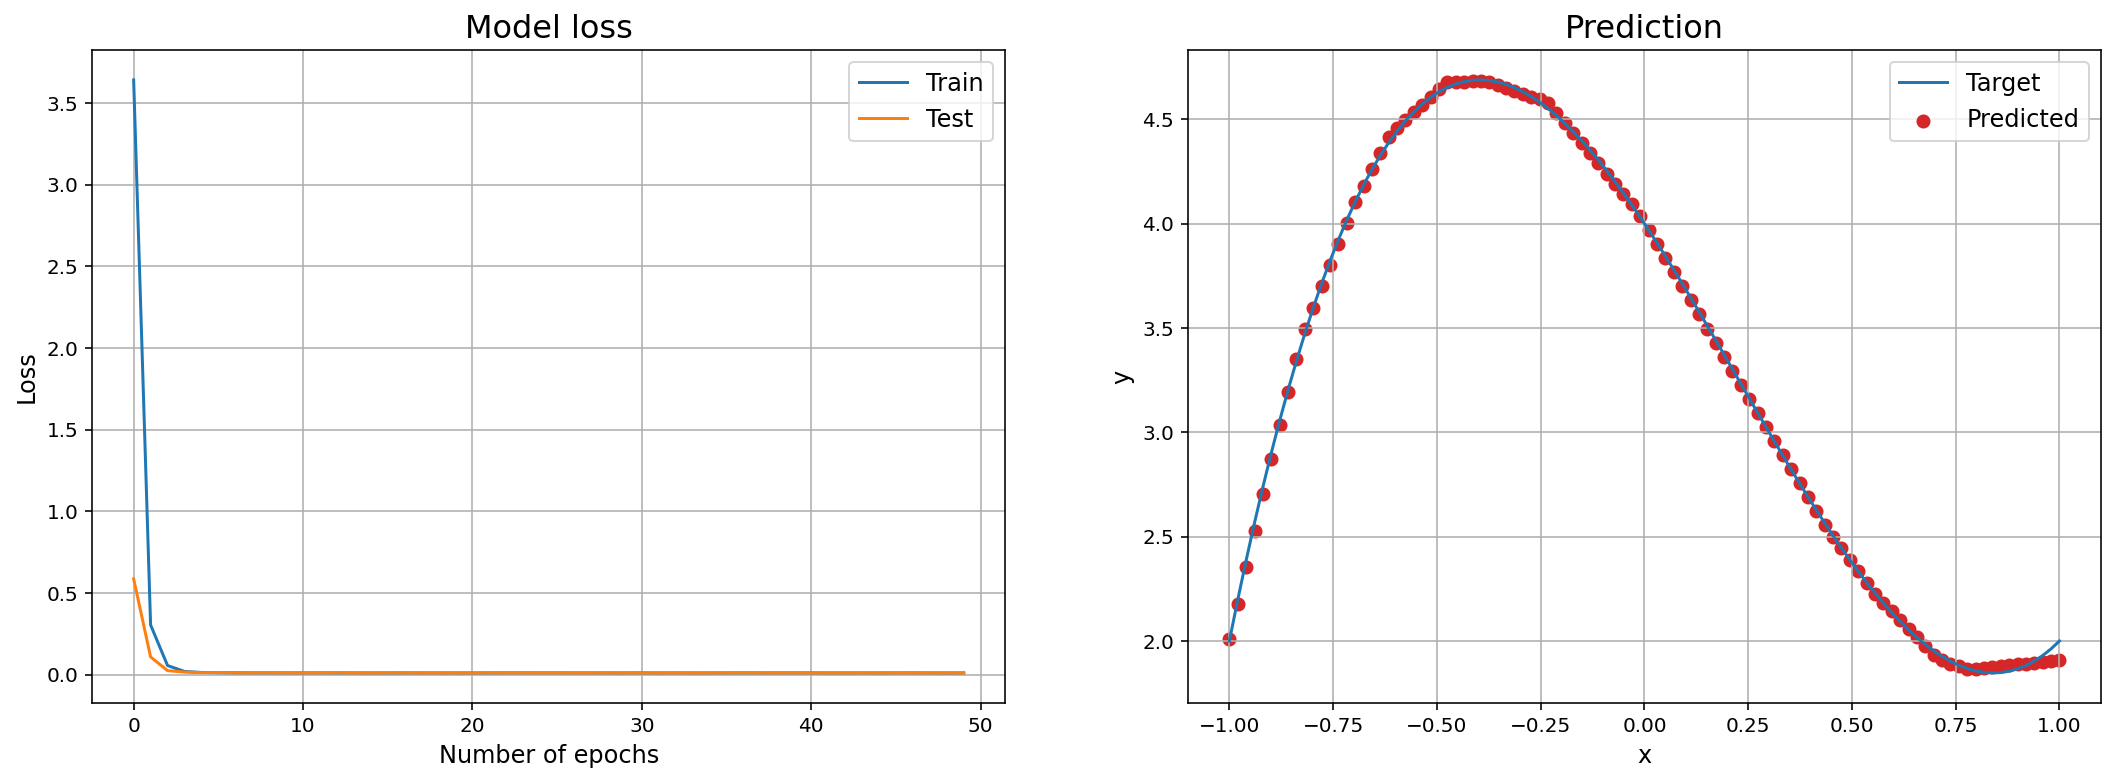

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0103101                        Test loss = 0.0002253
 Test accuracy = 0.0103101                    Test accuracy = 0.0002253



In [17]:
model8 = tf.keras.Sequential()
model8.add(Dense(13, input_shape=(1,), activation='relu'))
model8.add(Dense(9, activation='relu'))
model8.add(Dense(9, activation='relu'))
model8.add(Dense(1, activation='relu'))
model8.compile(optimizer='Adam', loss='mse', metrics=['mse'])

graph(model8)

I risultati ottenuti sono migliori rispetto a quanto avevamo trovato utilizzando <i>SGD</i>. Rimane ancora il problema dell'andamento piatto predetto dalla rete in prossimità dell'estremo destro dell'intervallo di training, tuttavia notiamo che ora la retta ha un coefficiente angolare positivo, a differenza di quando ottenuto finora. Utilizzeremo quindi <i>Adam</i> come ottimizzatore.

Vediamo ora cosa succede cambiando funzione costo, utilizzando <i>MSLE</i>.

#### Funzione costo - MSLE

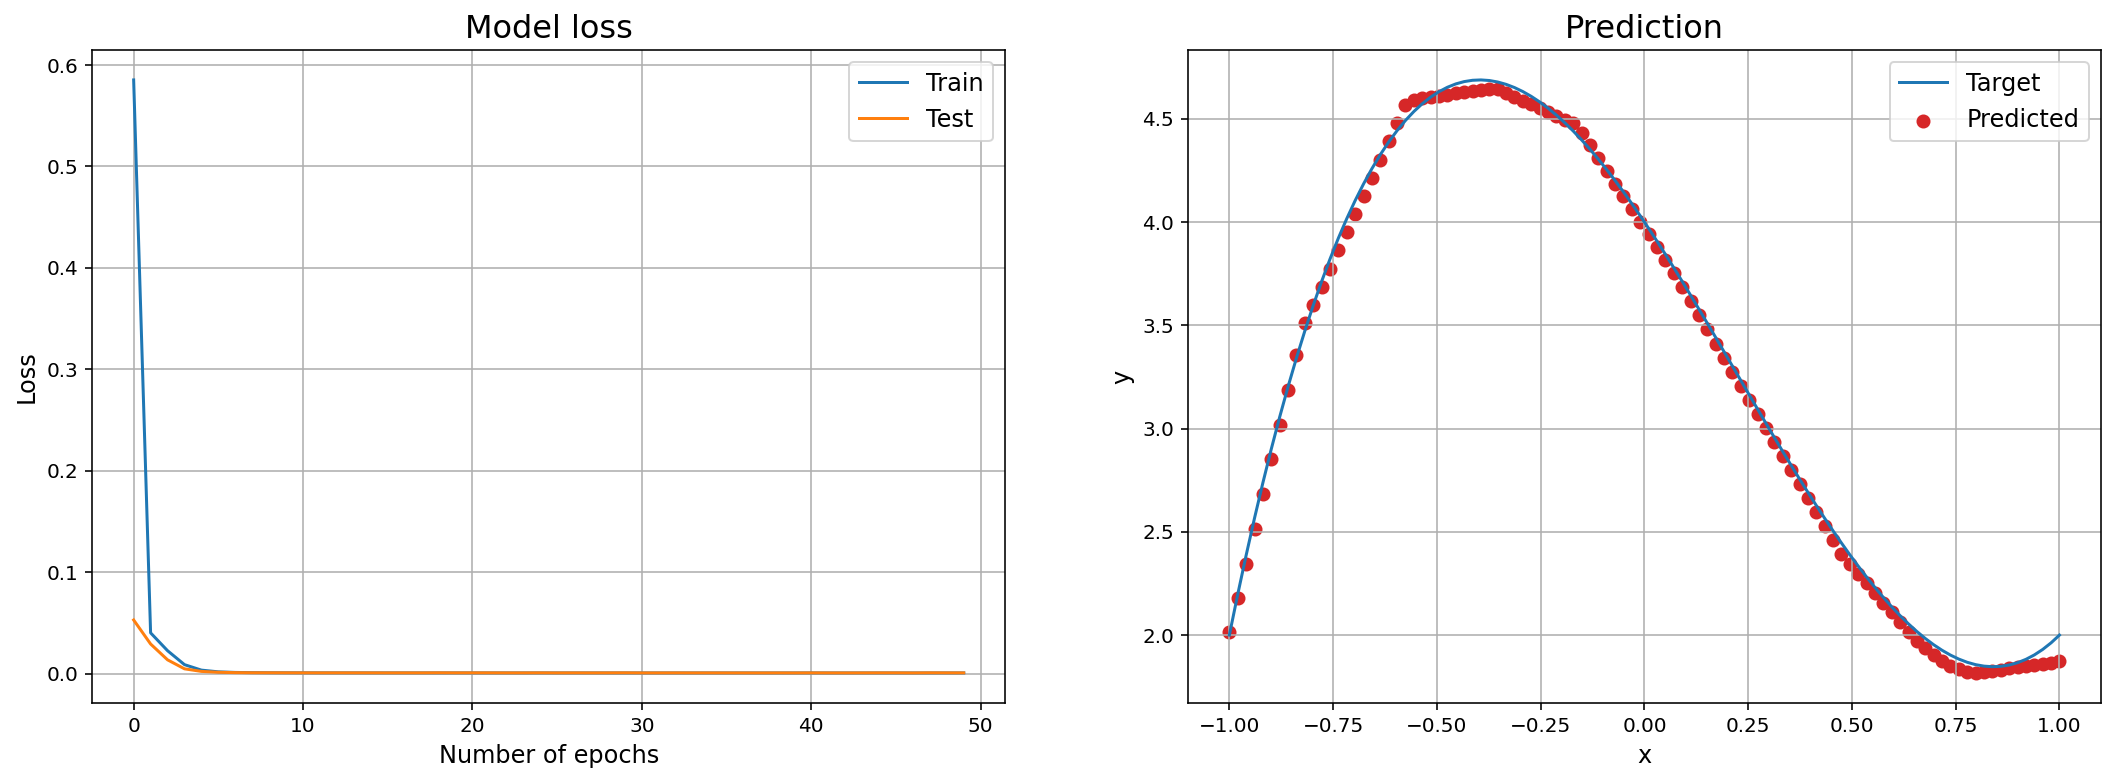

Evaluate model with valid set                Evaluate model with exact curve
 Test loss = 0.0007388                        Test loss = 0.0000985
 Test accuracy = 0.0113772                    Test accuracy = 0.0014438



In [18]:
model9 = tf.keras.Sequential()
model9.add(Dense(13, input_shape=(1,), activation='relu'))
model9.add(Dense(9, activation='relu'))
model9.add(Dense(9, activation='relu'))
model9.add(Dense(1, activation='relu'))
model9.compile(optimizer='Adam', loss='msle', metrics=['mse'])

graph(model9)

L'utilizzo di questa funzione costo non migliora la performance della rete neurale.

Si è infine valutata la performance della rete al di fuori dell'intervallo di allenamento. 

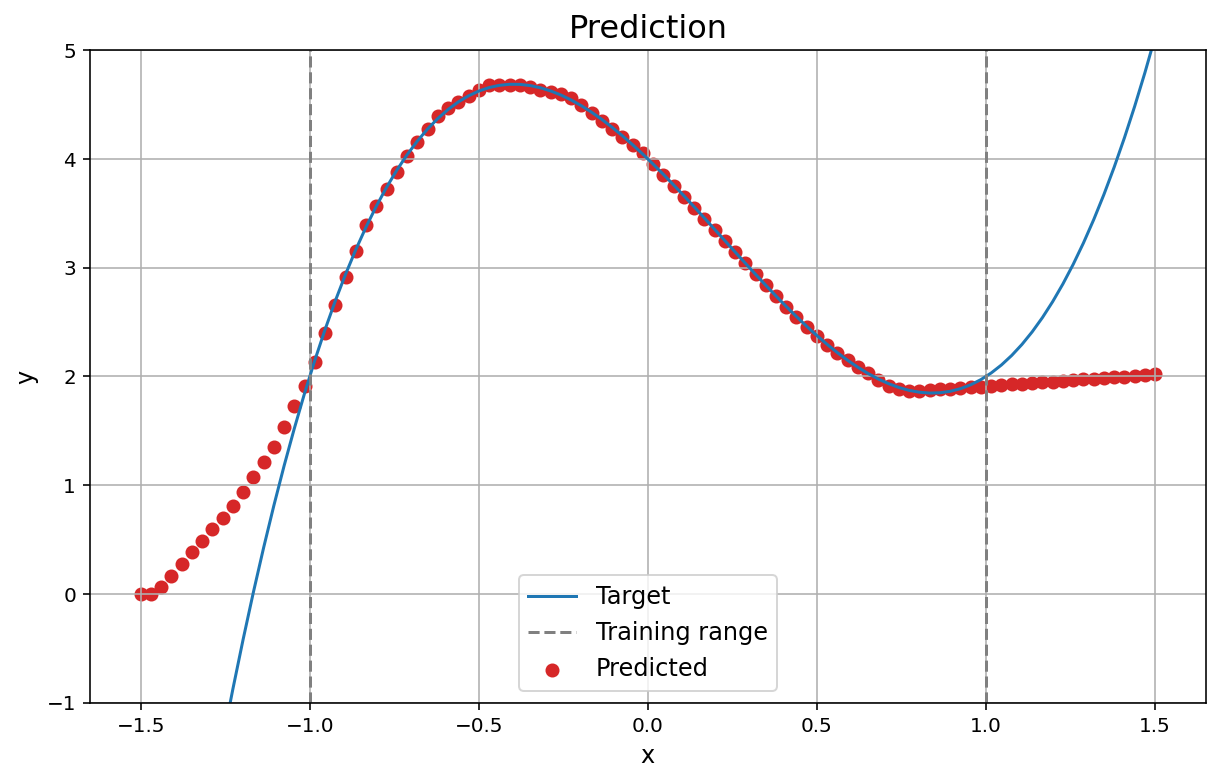

In [27]:
x = np.linspace(-1.5, 1.5, 100)
y_target = f(x) # ideal (target) linear function
y_predicted = model8.predict(x)
plt.figure(figsize=(10,6))
plt.plot(x,y_target, label='Target', color='tab:blue')
plt.scatter(x, y_predicted,color='tab:red', label='Predicted')
plt.plot([-1,-1],[-1,5], linestyle='dashed',c='grey', label='Training range')
plt.plot([1,1],[-1,5], linestyle='dashed',c='grey')
plt.title('Prediction', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.ylim(-1,5)
plt.grid(True)
plt.legend(loc = 'best', fontsize=12)
plt.show()

I risultati ottenuti sono pessimi, ma questo ce lo si poteva aspettare. Infatti la rete durante la fase di allenamento non acquisisce nessuna informazione sulla forma analitica della funzione, ma solo del suo andamento in quell'intervallo. Al di fuori dell'intervallo, siccome la funzione di attivazione è lineare a tratti, l'andamento riprodotto è lineare.

### Esercizio 11.3

In quest'ultimo esercizio vogliamo costruire una rete neurale in grado di fittare dei dati distributi, sempre con rumore Gaussiano ($\sigma = 0.1$), secondo la seguente funzione a due variabili

$$f(x,y) = \sin(x^2+y^2)$$

per $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$. Nel costruire la rete l'unica differenza rispetto ai casi precedenti è che ora i neuroni ricevono in input un vettore a due componenti, invece che una sola variabile reale: il layer di input sarà quindi formato da 2 neuroni. <br>
Sulla base dei risultati ottenuti nel precedente esercizio, costruiamo la nostra rete neurale. La configurazione è quella costituita da 3 layer nascosti; ora aumentiamo ulteriormente il numero di neuroni in ogni layer a causa della maggiore complessità del problema. La struttura della rete è: <b>(2,40,35,27,1)</b>. Utilizziamo <i>Relu</i> come funzione di attivazione, <i>Adam</i> come ottimizzatore e <i>MSE</i> come funzione costo. Per il fit abbiamo utilizzato $10000$ dati di training e $100$ epoche per l'allenamento della rete.

Di seguito viene riportata la distribuzione dei dati di validazione rispetto alla funzione da fittare. Successivamente vengono riportati l'andamento della funzione costo all'aumentare del numero di epoche sia per i dati di training che di validazione e la predizione della rete nell'intervallo di training.

In [20]:
def f(x,y):
    return np.sin(x**2+y**2)

In [21]:
N_train = 10000
sigma = 0.1
N_epochs = 100

x_train = np.random.uniform(-1.5, 1.5, N_train)
x_valid = np.random.uniform(-1.5, 1.5, int(N_train/10))
y_train = np.random.uniform(-1.5, 1.5, N_train)
y_valid = np.random.uniform(-1.5, 1.5, int(N_train/10))
x_valid.sort()

xy_train = np.array([x_train, y_train])
xy_train = xy_train.transpose()
xy_valid = np.array([x_valid, y_valid])
xy_valid = xy_valid.transpose()

z_target = f(x_valid, y_valid) # ideal (target) function
z_train = np.random.normal(f(x_train, y_train), sigma)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

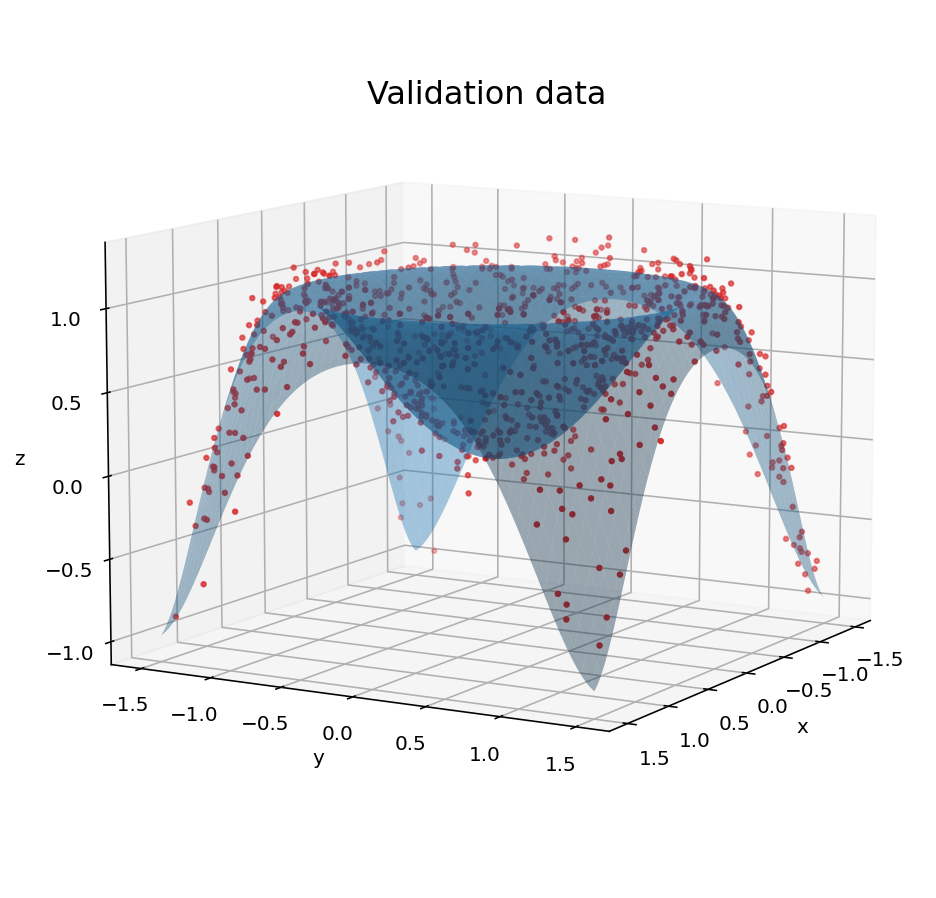

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_valid, y_valid, z_valid, marker='.', c='tab:red')
x_plot = np.linspace(-1.5,1.5, 100)
y_plot = np.linspace(-1.5,1.5, 100)
X, Y = np.meshgrid(x_plot,y_plot)
ax.plot_surface(X, Y, f(X,Y), alpha=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Validation data", fontsize=16, y=0.96)
ax.view_init(10, 30)

In [23]:
model = Sequential()
model.add(Dense(40, input_shape=(2,), activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=xy_train, y=z_train, batch_size=32, epochs=N_epochs,shuffle=True,
                        validation_data=(xy_valid, z_valid), verbose=0)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 40)                120       
_________________________________________________________________
dense_47 (Dense)             (None, 35)                1435      
_________________________________________________________________
dense_48 (Dense)             (None, 27)                972       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 28        
Total params: 2,555
Trainable params: 2,555
Non-trainable params: 0
_________________________________________________________________


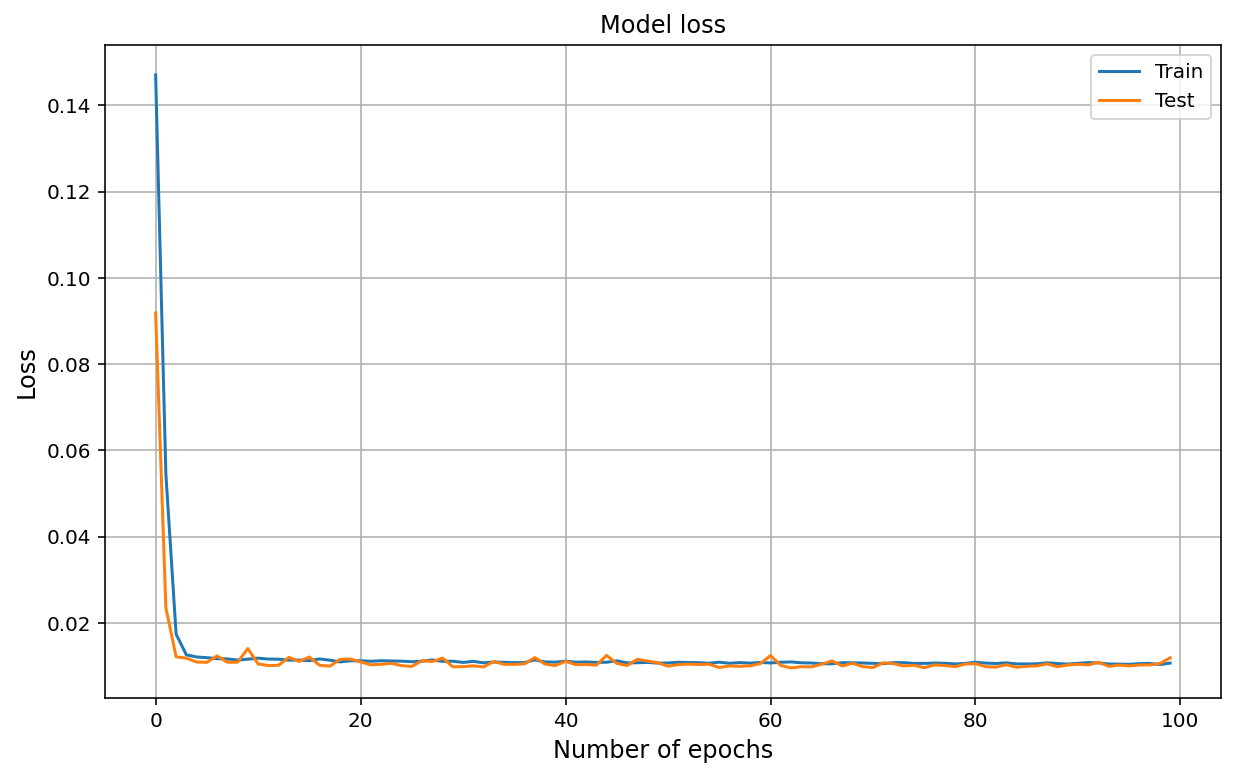


Model evaluated through validation set:              Model evaluated through exact curve:
Test loss: 0.011911073699593544                         Test loss: 0.0024383263662457466
Test accuracy: 0.011911073699593544                     Test accuracy: 0.0024383263662457466


In [24]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color='tab:blue')
plt.plot(history.history['val_loss'], color='tab:orange')
plt.title('Model loss')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Number of epochs', fontsize=12)
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()
# evaluate model with validation set AND exact values
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=0)
score2 = model.evaluate(xy_valid, z_target, batch_size=32, verbose=0)
print()
print('Model evaluated through validation set:', "           ", ' Model evaluated through exact curve:')
print('Test loss:', score[0], "                       ", 'Test loss:', score2[0])
print('Test accuracy:', score[1], "                   ", 'Test accuracy:', score2[1])

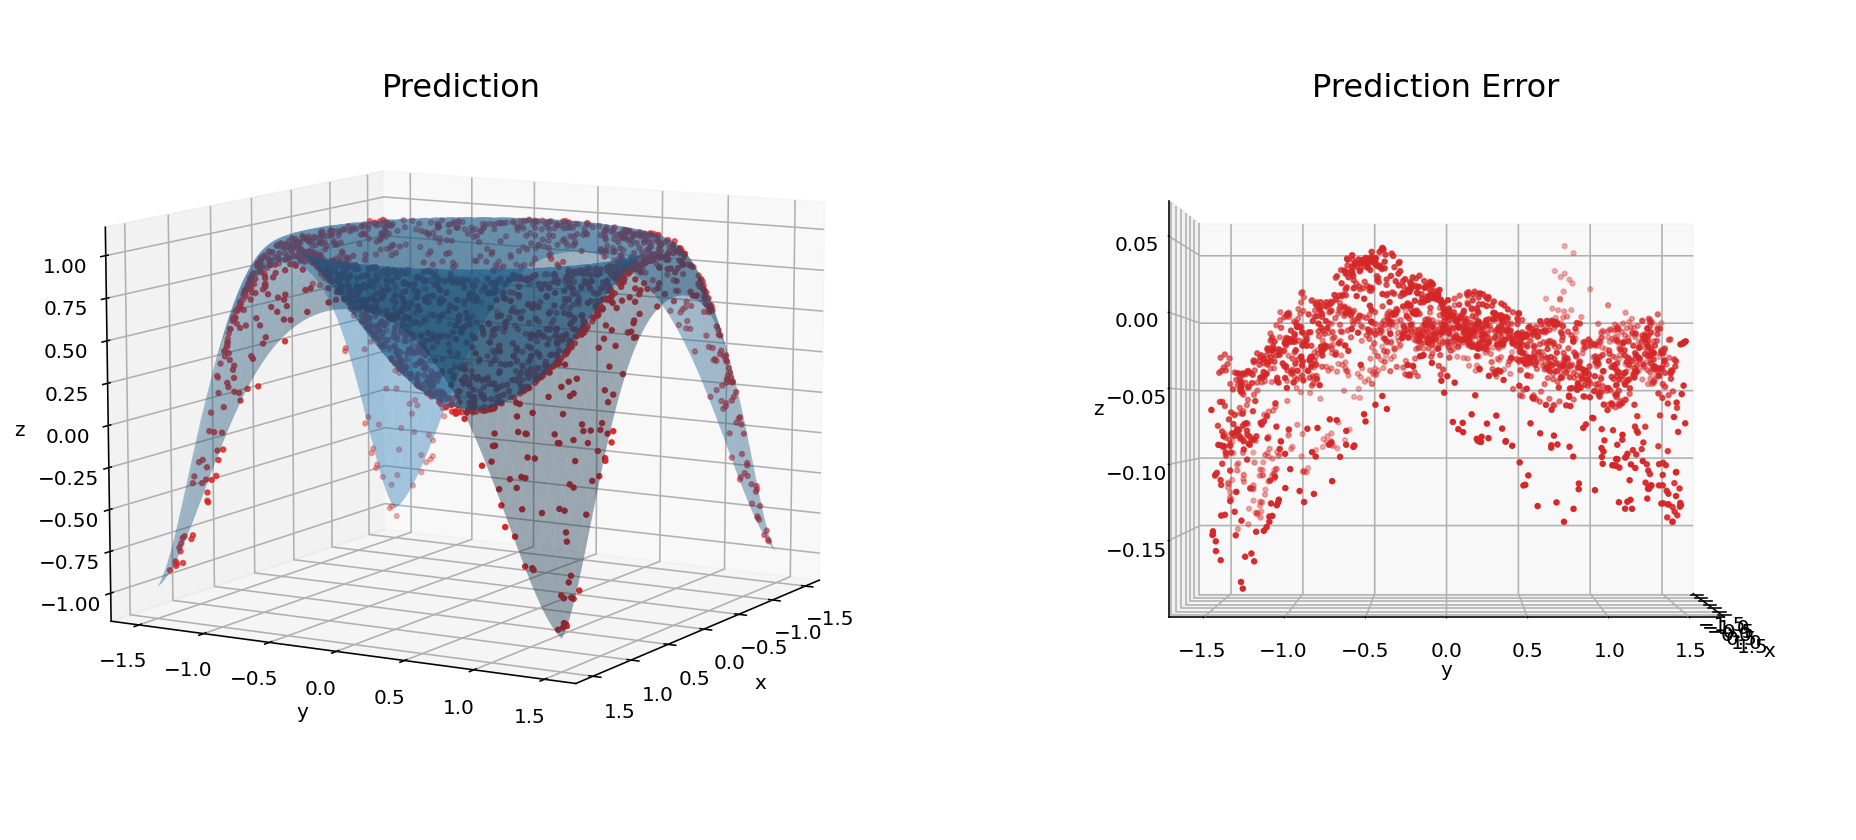

In [25]:
x_predicted = np.random.uniform(-1.5, 1.5, 2000)
y_predicted = np.random.uniform(-1.5, 1.5, 2000)
xy_predicted = np.array([x_predicted, y_predicted])
xy_predicted = xy_predicted.transpose()
z_predicted = model.predict(xy_predicted)

z_target = f(x_predicted, y_predicted)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x_predicted, y_predicted, z_predicted, marker='.', c='tab:red')
x_plot = np.linspace(-1.5,1.5, 100)
y_plot = np.linspace(-1.5,1.5, 100)
X, Y = np.meshgrid(x_plot,y_plot)
ax.plot_surface(X, Y, f(X,Y), alpha=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Prediction", fontsize=16, y=0.96)
ax.view_init(10, 30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x_predicted, y_predicted, np.transpose(z_predicted)-z_target, marker='.', c='tab:red')
#x_plot = np.linspace(-1.5,1.5, 100)
#y_plot = np.linspace(-1.5,1.5, 100)
#X, Y = np.meshgrid(x_plot,y_plot)
#ax.plot_surface(X, Y, f(X,Y), alpha=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Prediction Error", fontsize=16, y=0.96)
ax.view_init(azim=0.0, elev=0.0)
plt.show()

La rete costruita presenta ottime capacità predittive. Notiamo che la differenza tra la predizione e la funzione da fittare peggiora in prossimità degli estremi dell'intervallo considerato a causa dei pochi dati presenti in tale regione.